In [29]:
import pandas as pd

In [30]:
data1 = pd.read_csv("1apDashboardClientsDetails.csv",skiprows=1, index_col=False)
data2 = pd.read_csv("2apDashboardClientsDetails.csv",skiprows=1, index_col=False)
#data = pd.concat([data1, data2])

In [9]:
#return distance 
import math
def calculateDistance(signalLevelInDb, freqInMHz):
    if math.fabs(signalLevelInDb)>80:
        # we consider Signal Strength < -80 dBm as disconnected since connection is weak by then.  
        return 0
    else:
        exp = (27.55 - (20 * math.log10(freqInMHz)) + math.fabs(signalLevelInDb)) / 20.0
        return math.pow(10.0, exp)

In [16]:
#group data by ssid(AP), Client(devices) order by date time. 
data = data1.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 
sp_data

ssid             Client            Date time  channelFreq  \
0       APT_4125  2c:59:8a:6b:53:c5  2019-03-05 23:59:01       5240.0   
1       APT_4125  2c:59:8a:6b:53:c5  2019-03-06 00:00:01       5240.0   
2       APT_4125  2c:59:8a:6b:53:c5  2019-03-06 00:01:01       5240.0   
3       APT_4125  2c:59:8a:6b:53:c5  2019-03-06 00:02:01       5240.0   
4       APT_4125  2c:59:8a:6b:53:c5  2019-03-06 00:03:01       5240.0   
...          ...                ...                  ...          ...   
115839  APT_4840  c0:ee:fb:dd:2f:ed  2019-03-06 14:40:01       2437.0   
115840  APT_4840  c0:ee:fb:dd:2f:ed  2019-03-06 14:40:31       5220.0   
115841  APT_4840  c0:ee:fb:dd:2f:ed  2019-03-06 14:41:31       5220.0   
115842  APT_4840  c0:ee:fb:dd:2f:ed  2019-03-06 14:42:31       5220.0   
115843  APT_4840  c0:ee:fb:dd:2f:ed  2019-03-06 14:43:31       5220.0   

        signalStrength  
0                -54.0  
1                -52.0  
2                -55.0  
3                -55.0  
4                -55.0  
...                ...  
115839           -60.0  
115840           -55.0  
115841           -54.0  
115842           -53.0  
115843           -41.0  

[115844 rows x 5 columns]

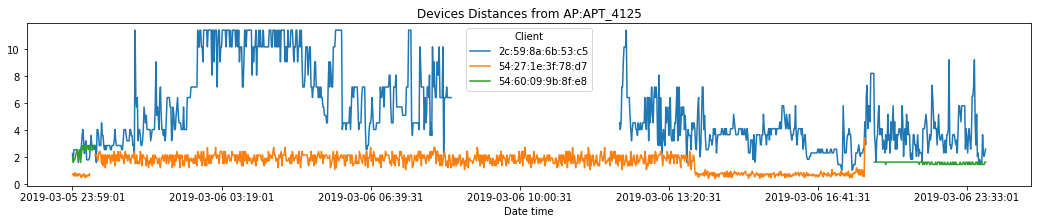

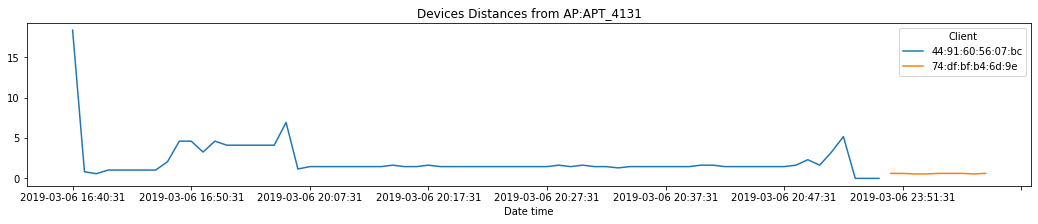

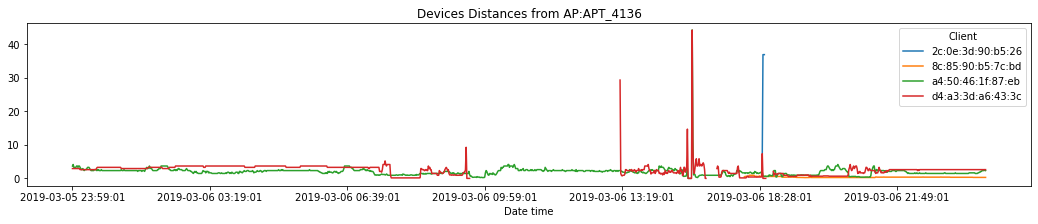

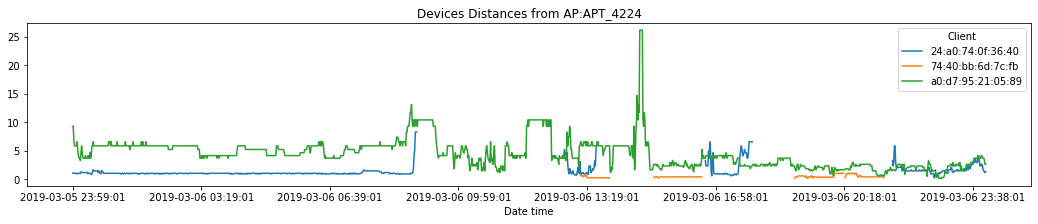

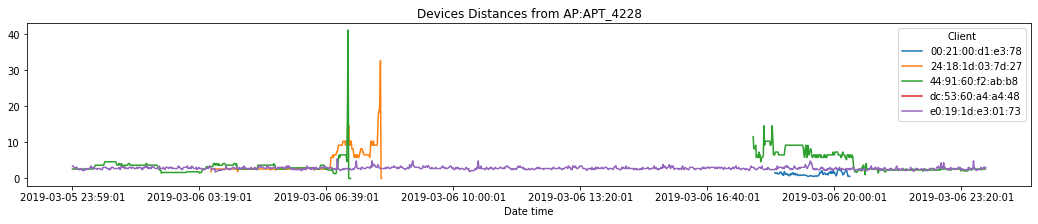

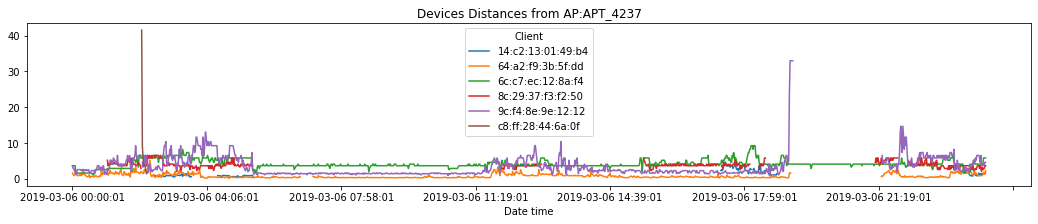

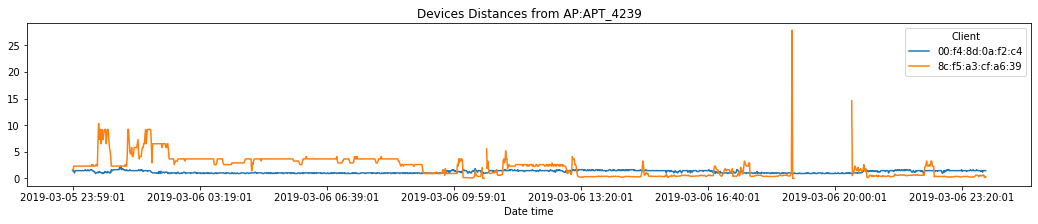

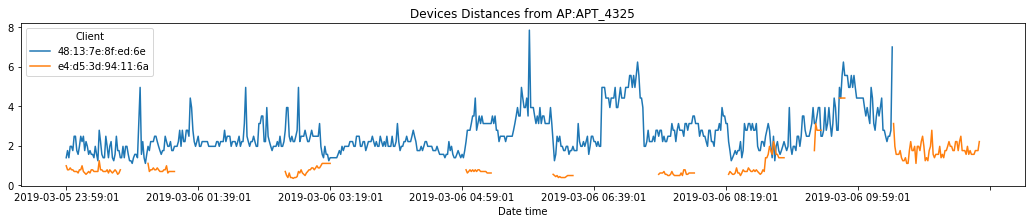

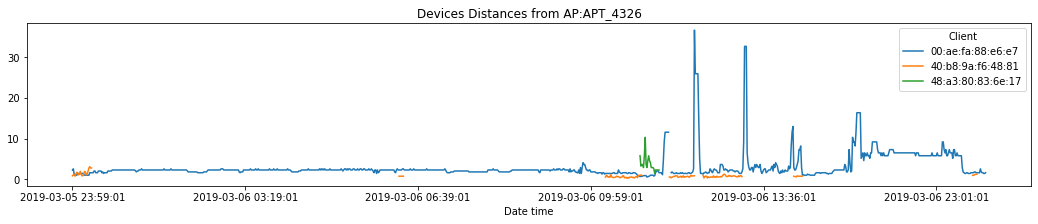

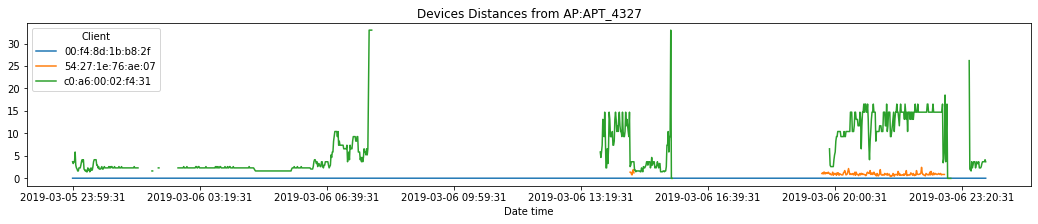

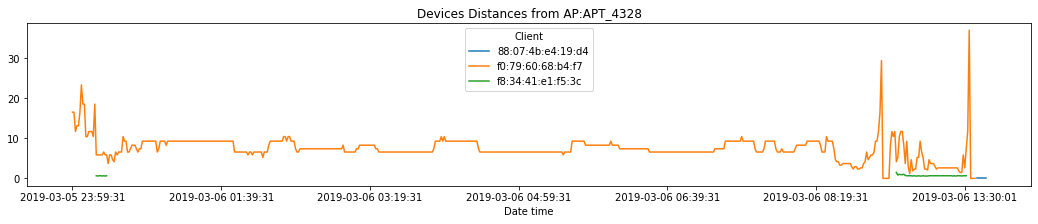

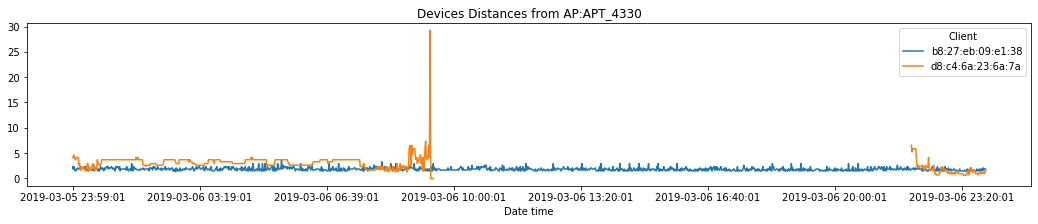

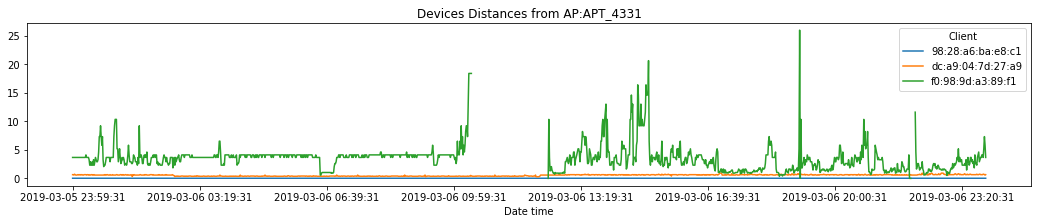

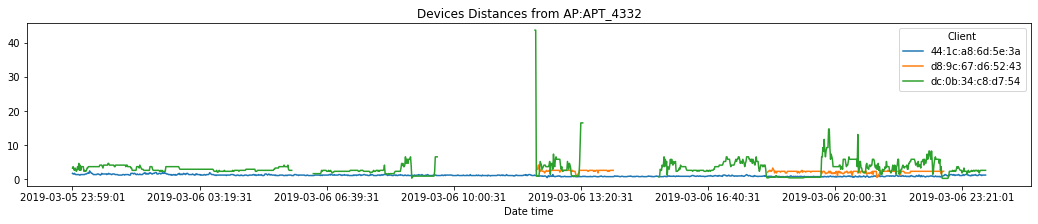

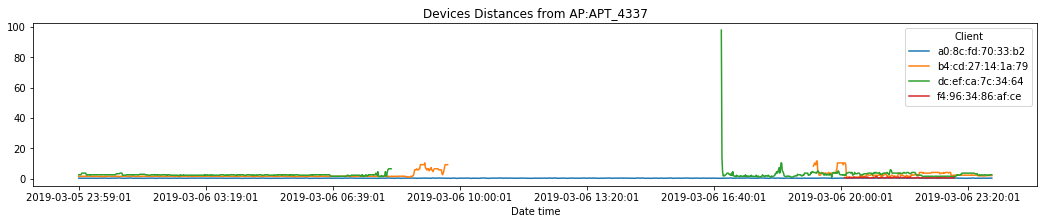

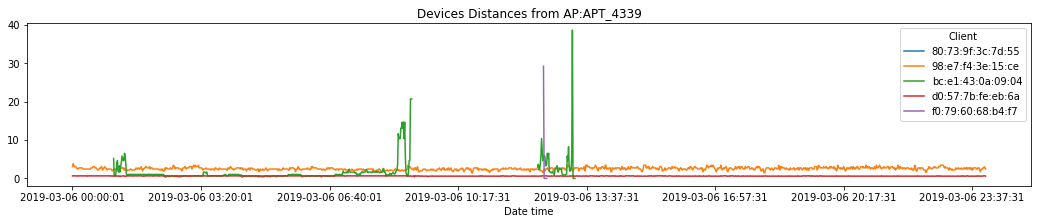

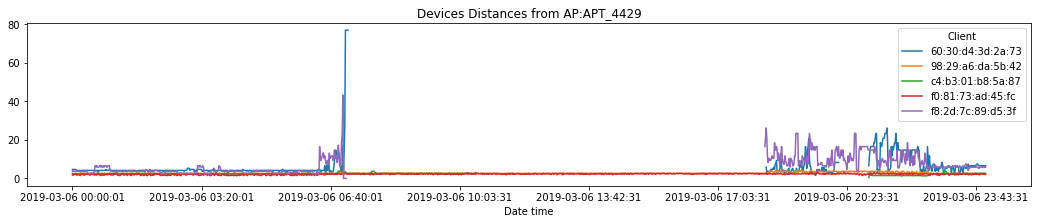

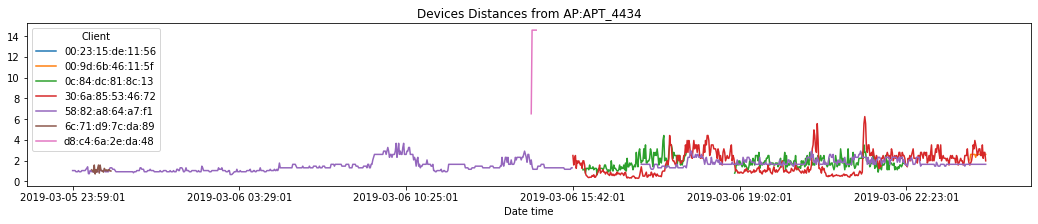

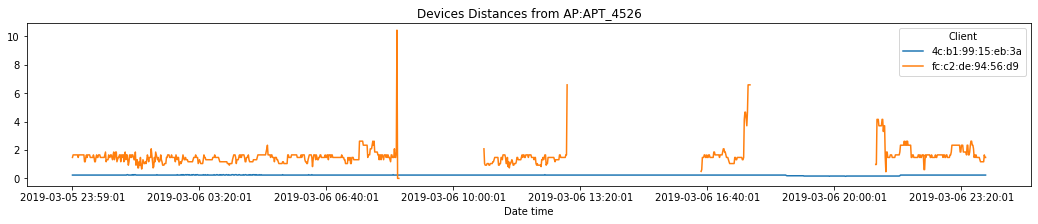

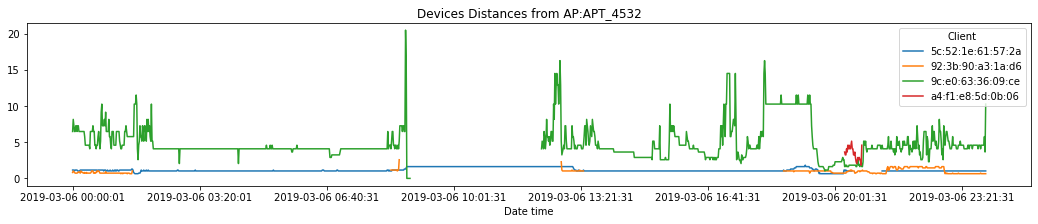

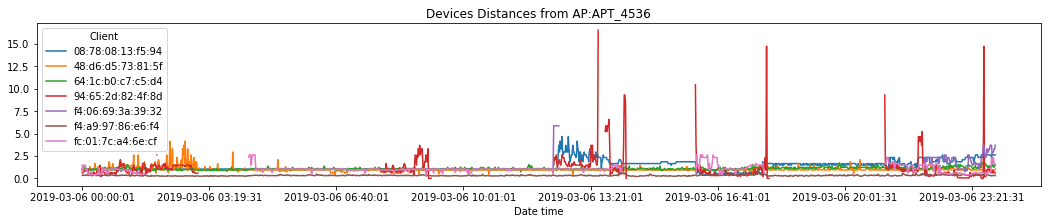

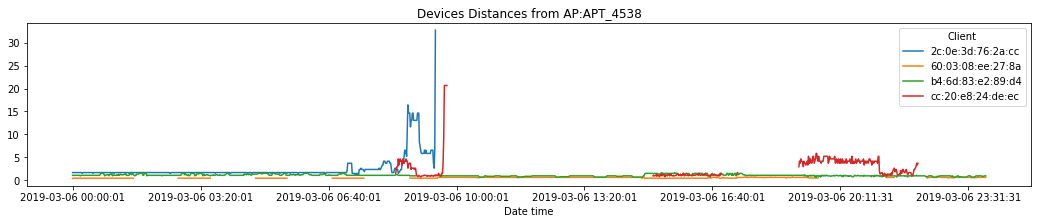

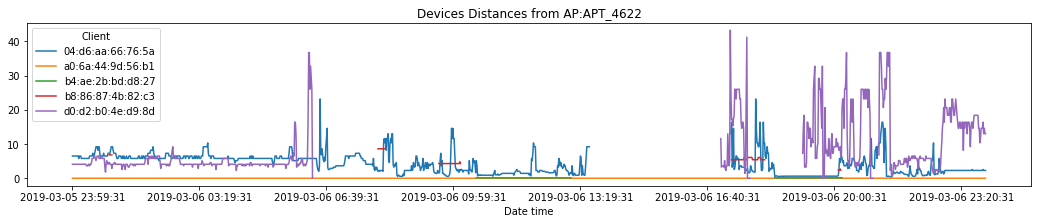

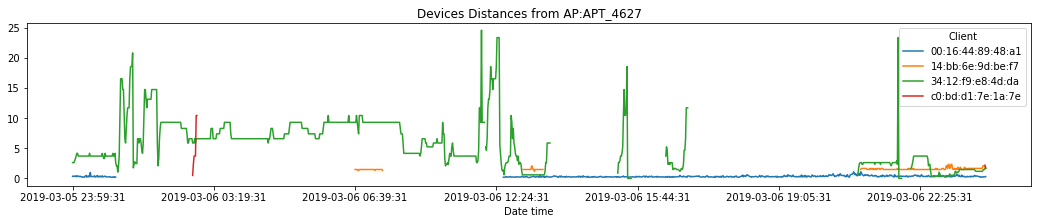

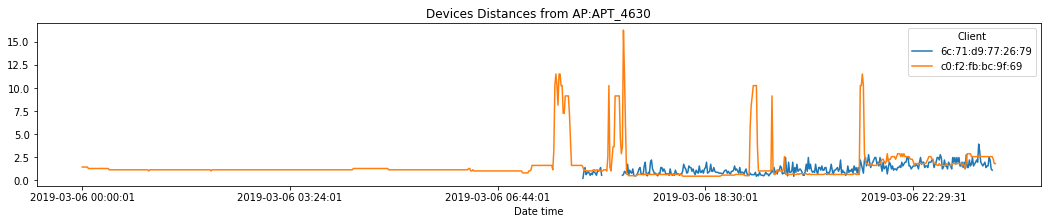

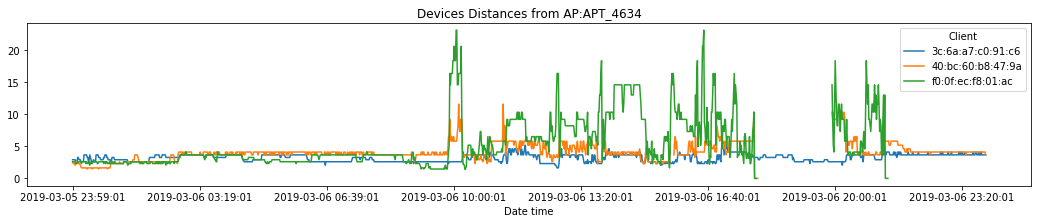

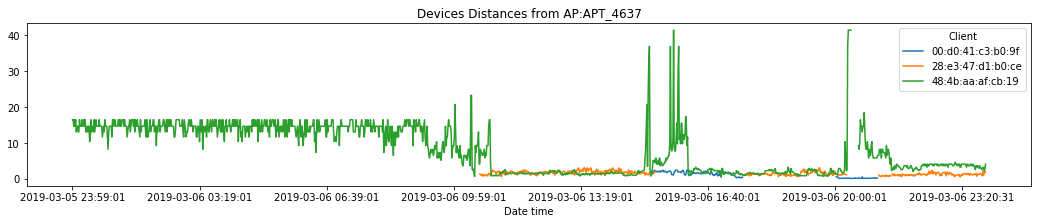

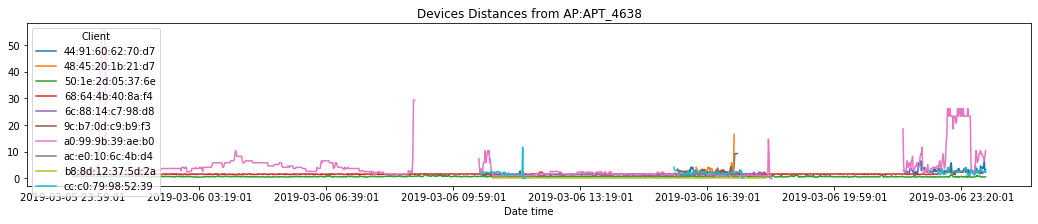

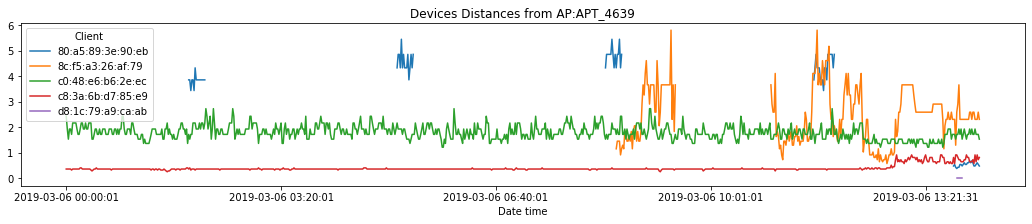

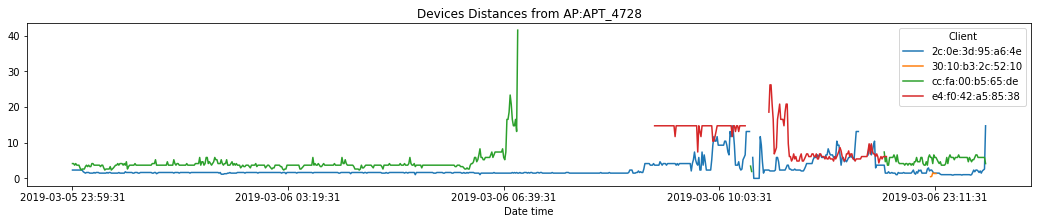

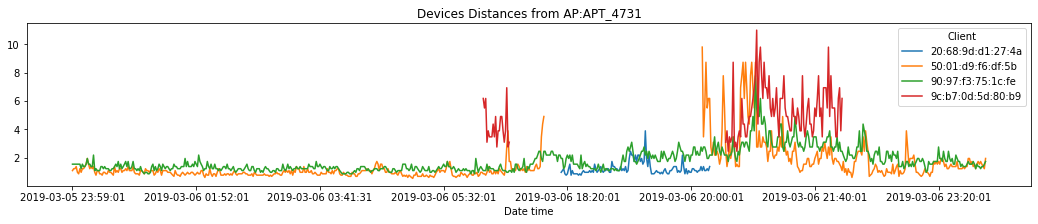

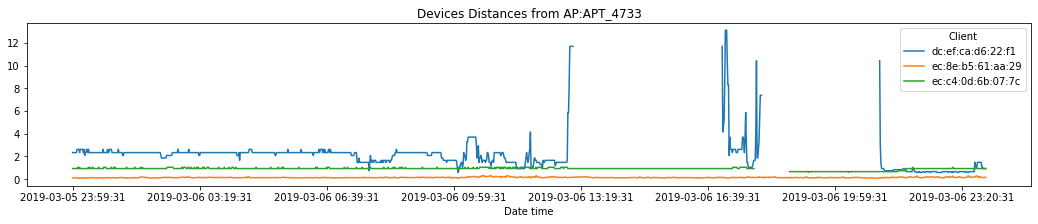

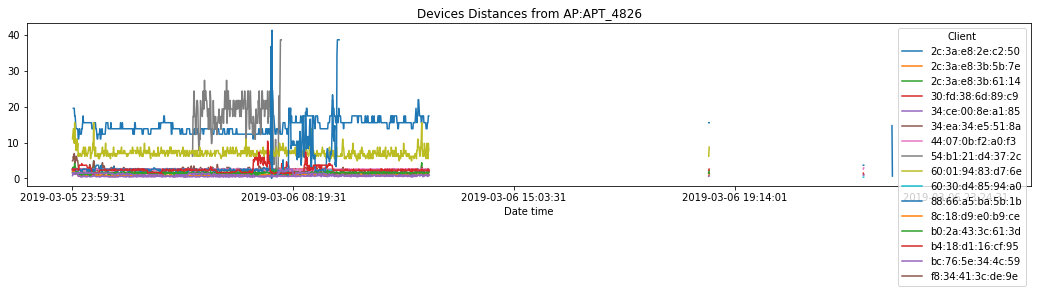

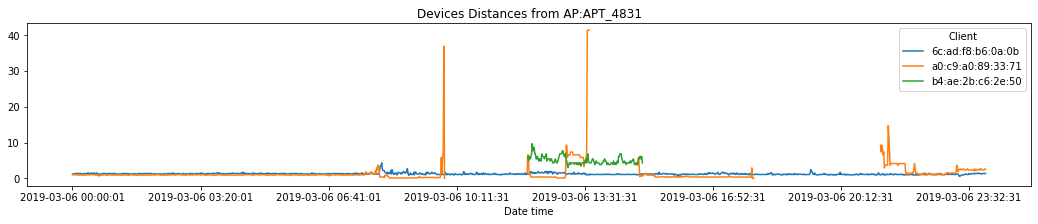

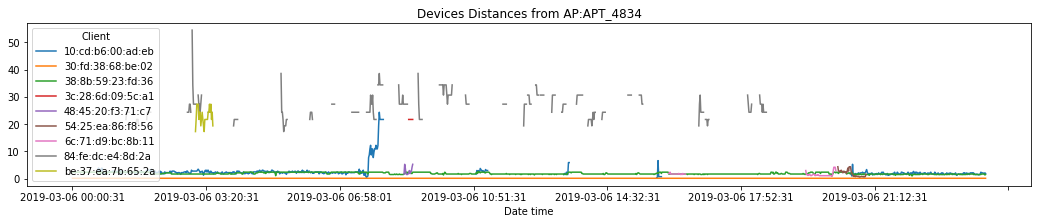

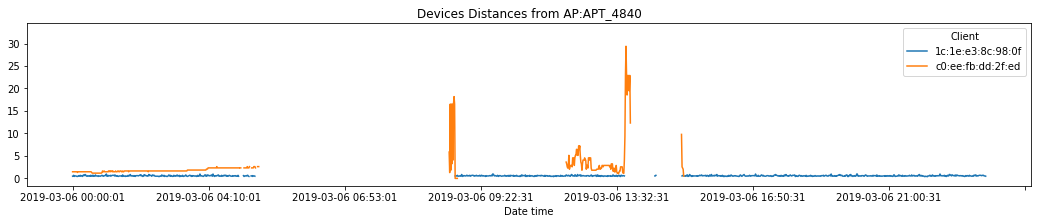

In [17]:
import warnings
warnings.filterwarnings('ignore')

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

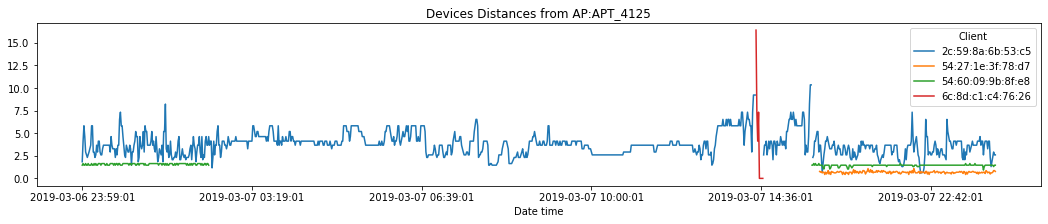

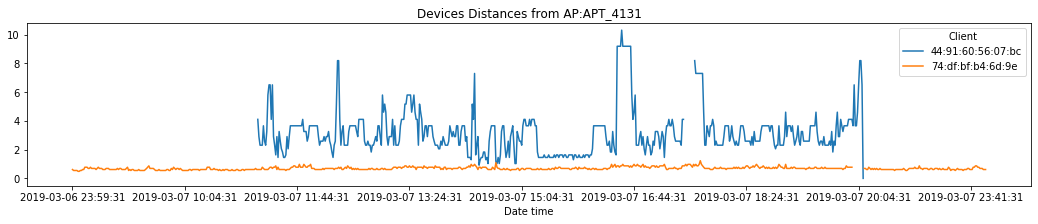

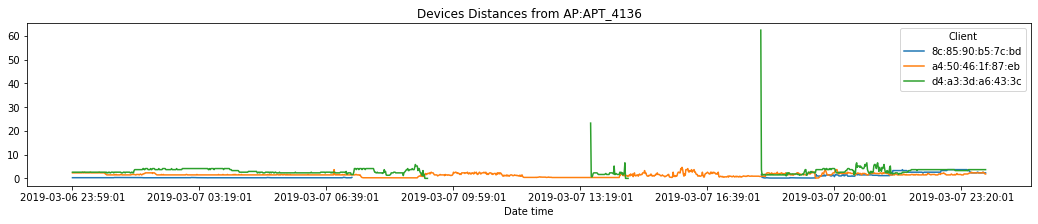

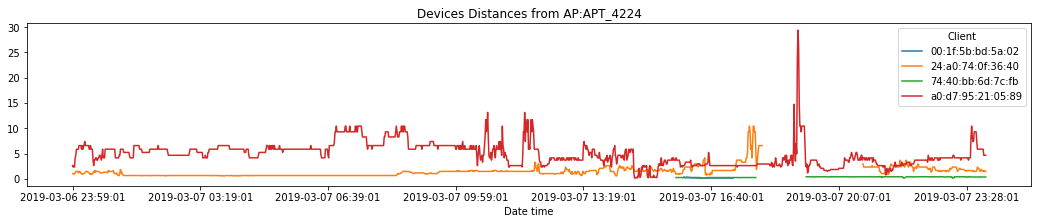

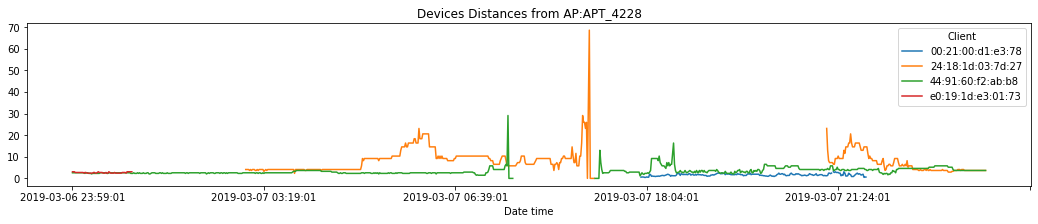

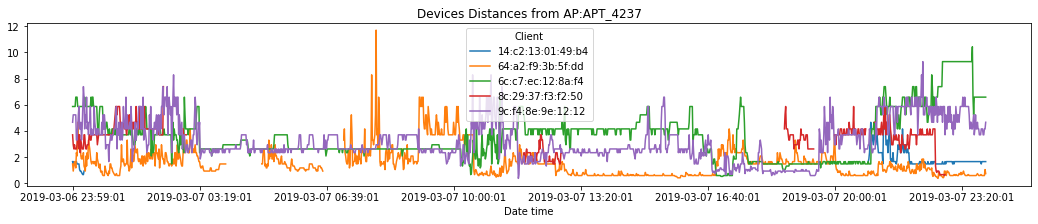

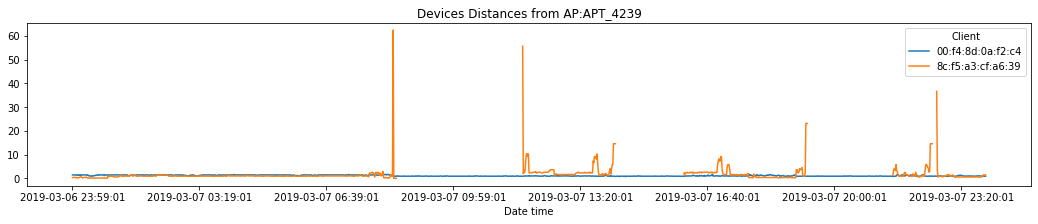

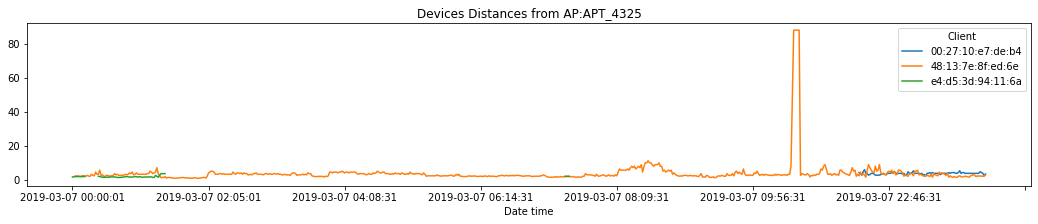

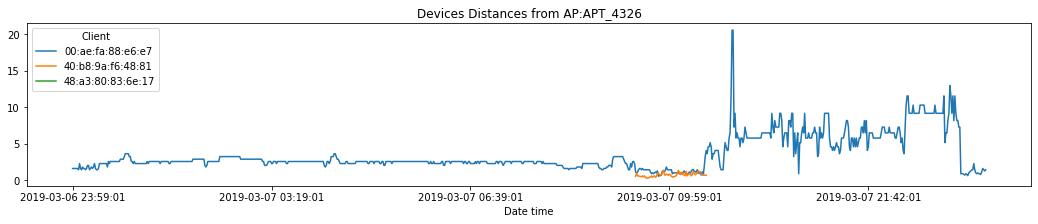

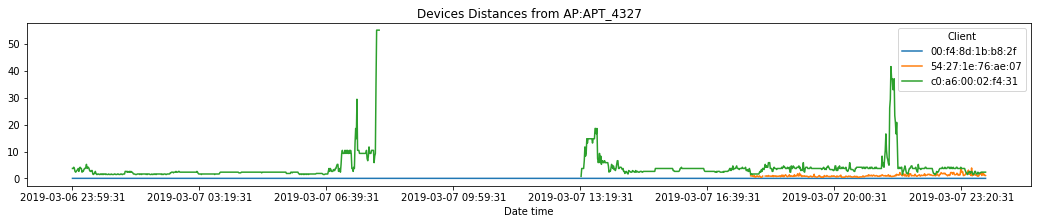

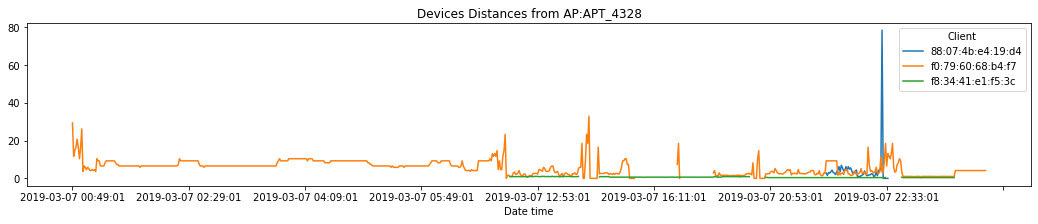

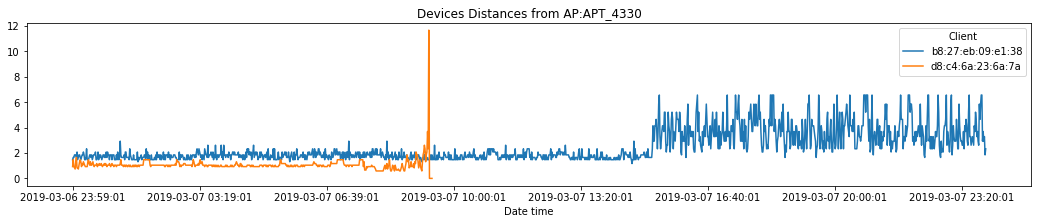

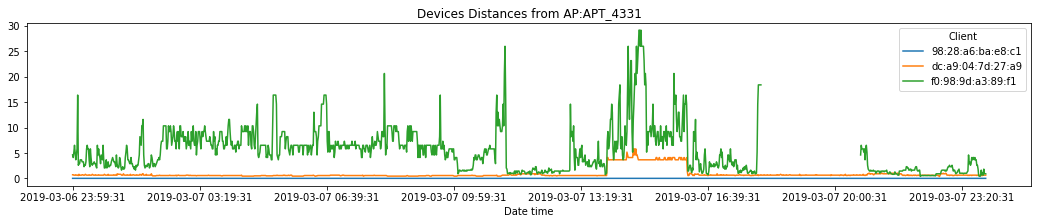

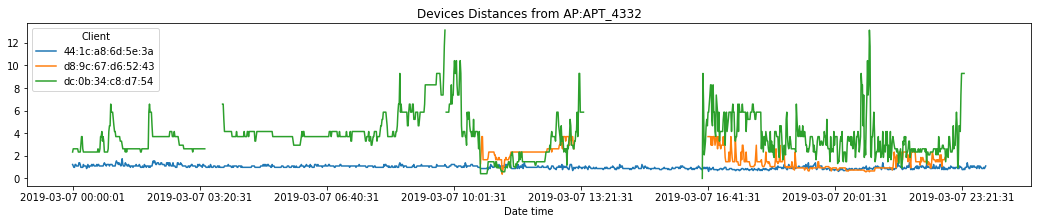

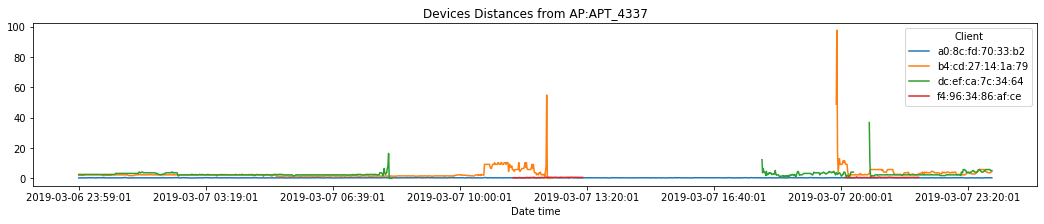

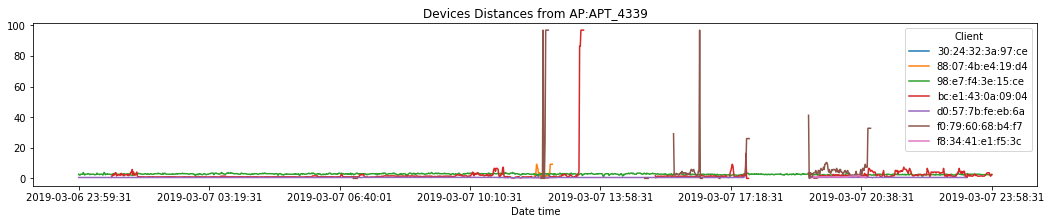

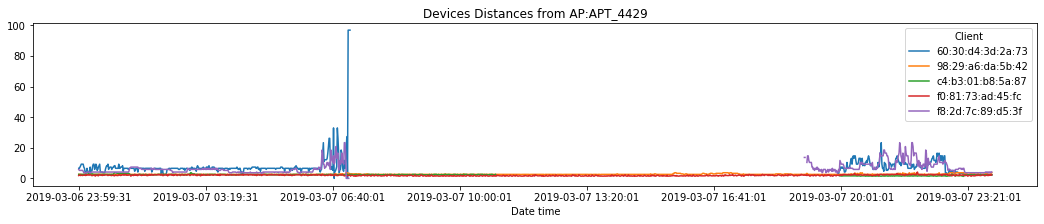

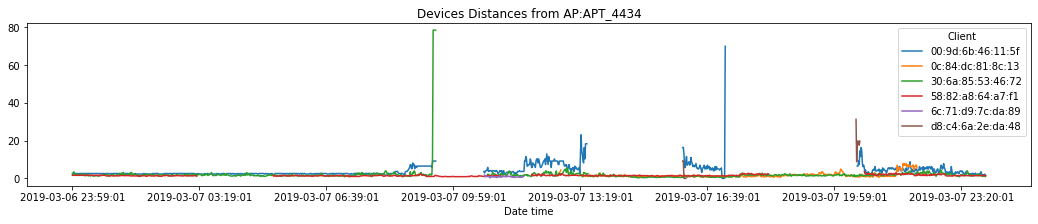

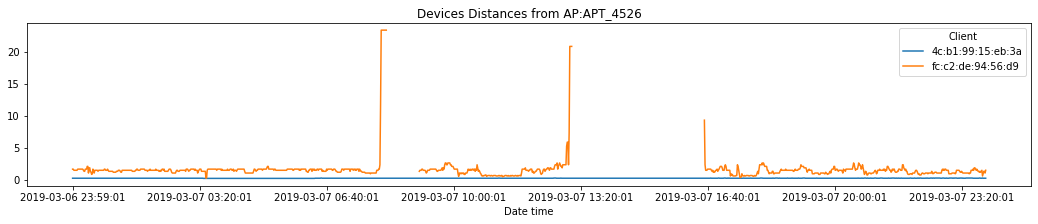

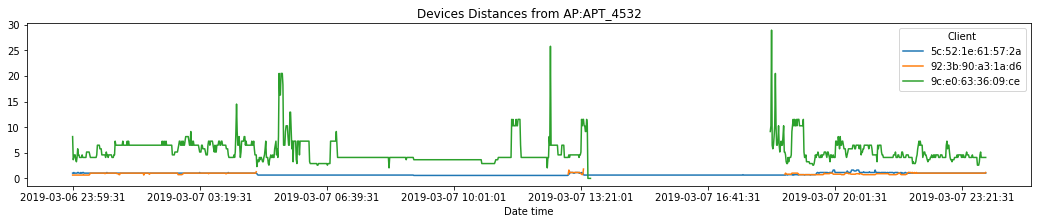

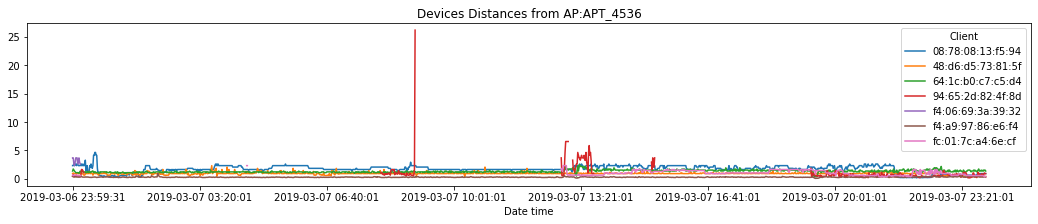

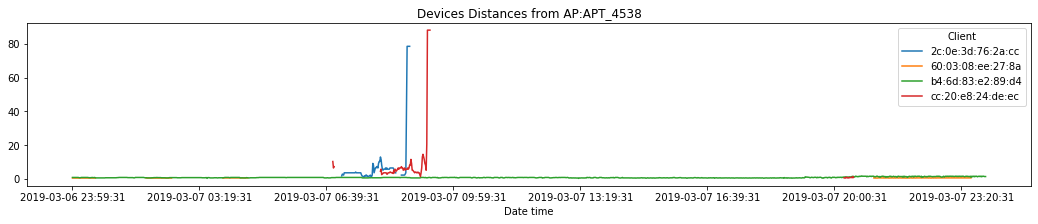

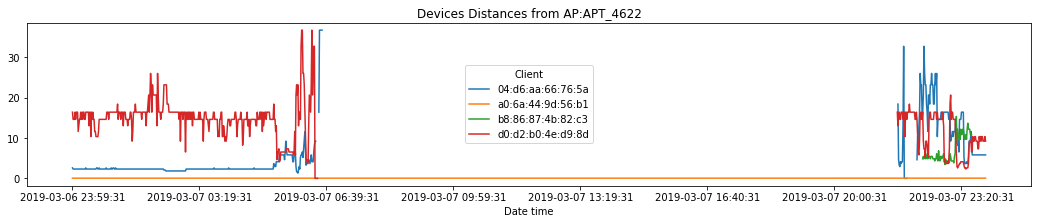

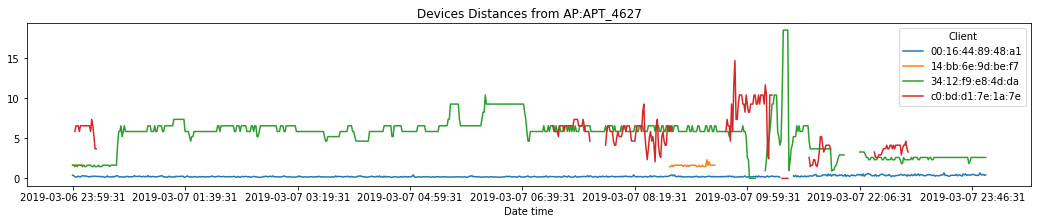

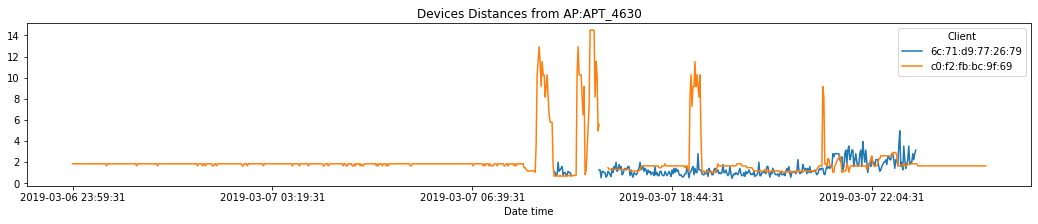

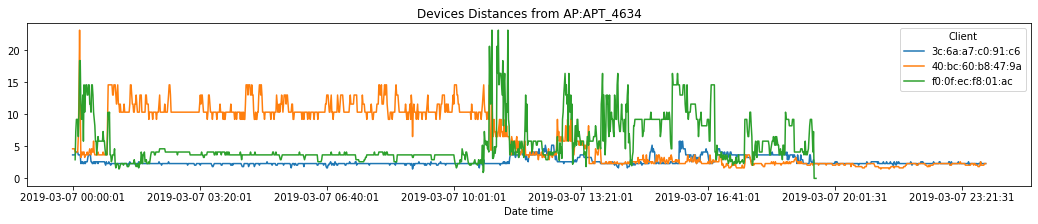

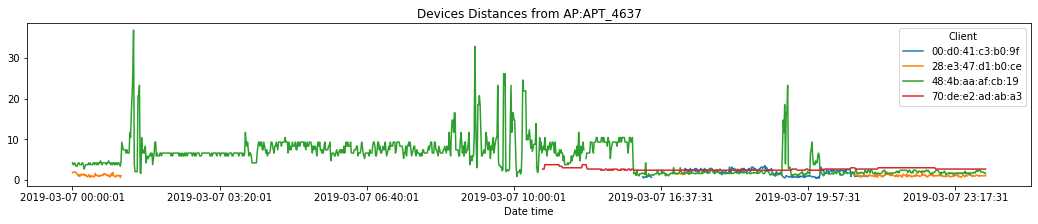

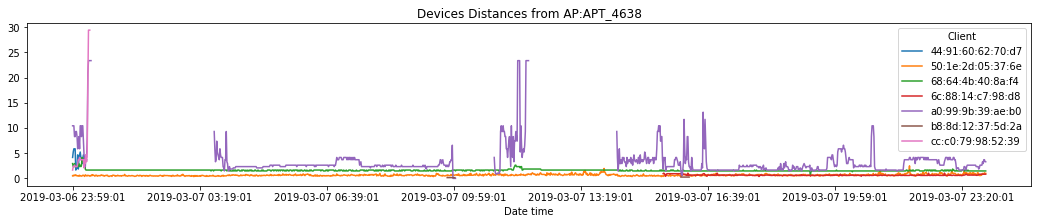

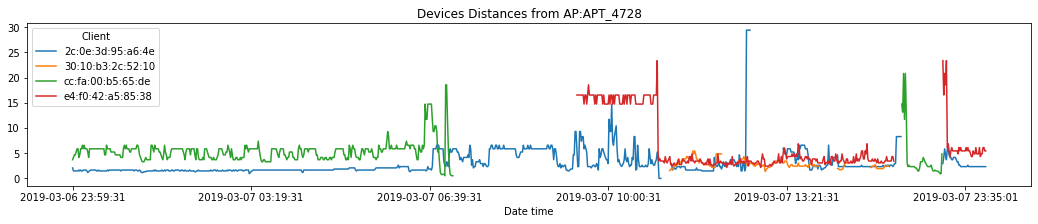

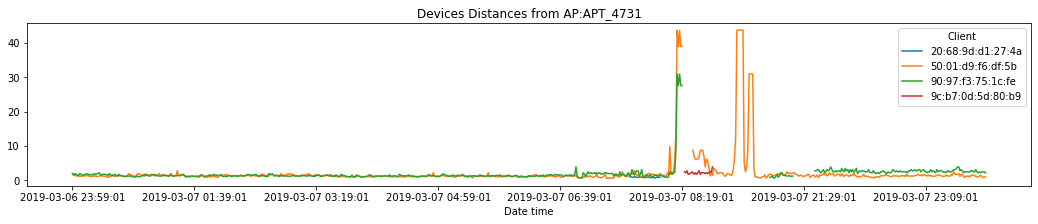

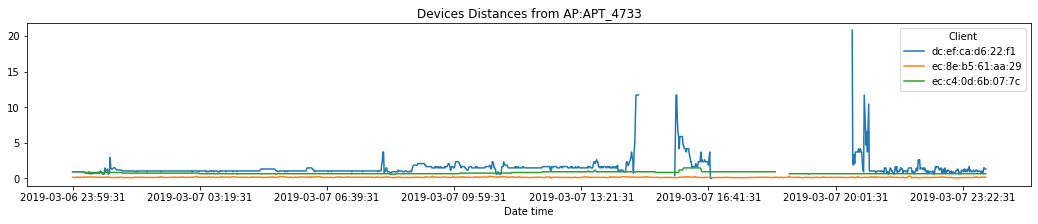

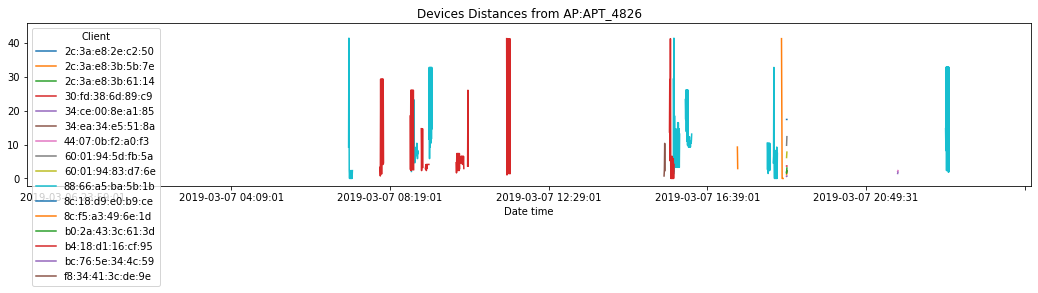

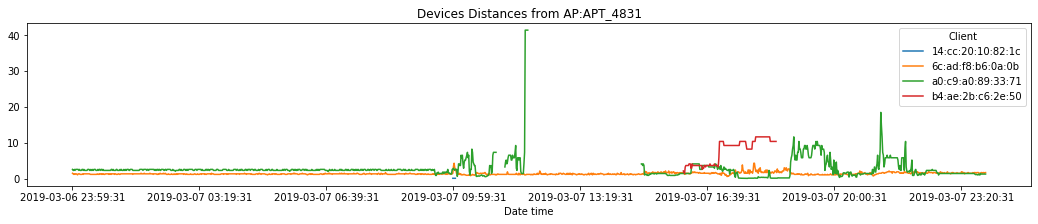

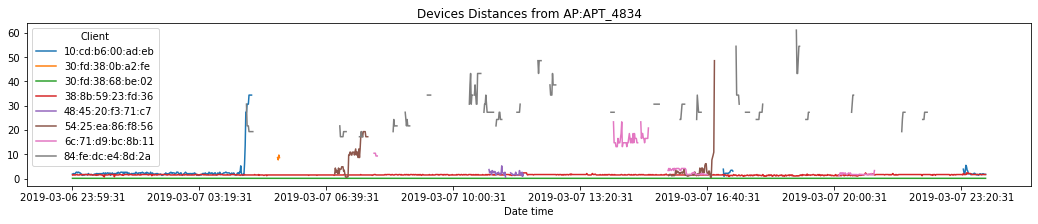

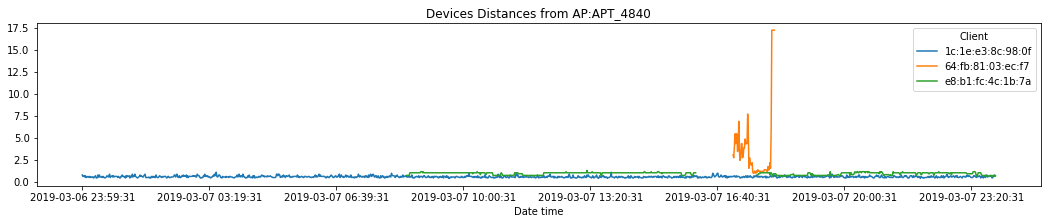

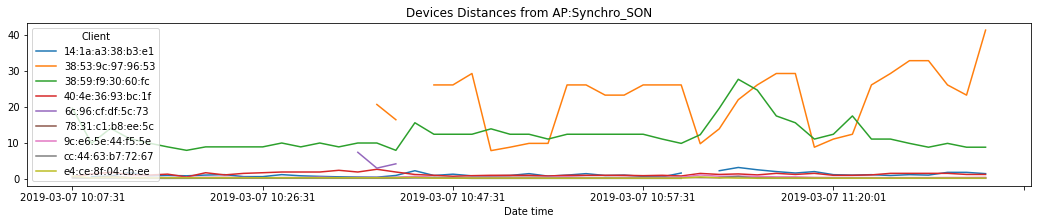

In [15]:
# test with file2
data = data2.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data['distance'] = ap_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

In [31]:
#add signal strength threshold, set signal power < -70dBm as disconnected, and minimal distance is 1m, 
# also rounded return value with 2-demical float number,to make the result more realistic. 
import math
def calculateDistance(signalLevelInDb, freqInMHz):    
    if math.fabs(signalLevelInDb)>80: 
        result = 0
    else:
        exp = (27.55 - (20 * math.log10(freqInMHz)) + math.fabs(signalLevelInDb)) / 20.0
        result = math.pow(10.0, exp)
    if result < 1.00:
        result = 1.00
    return round(result,2)

In [32]:
import warnings
warnings.filterwarnings('ignore')

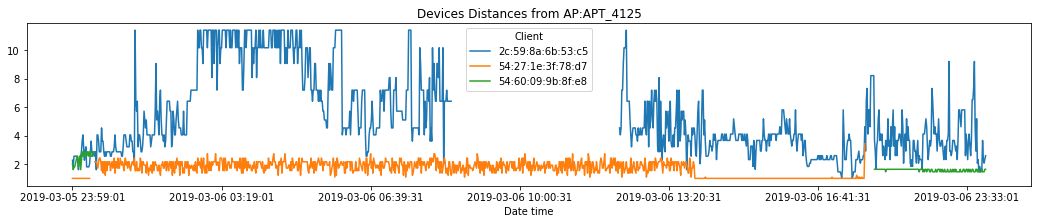

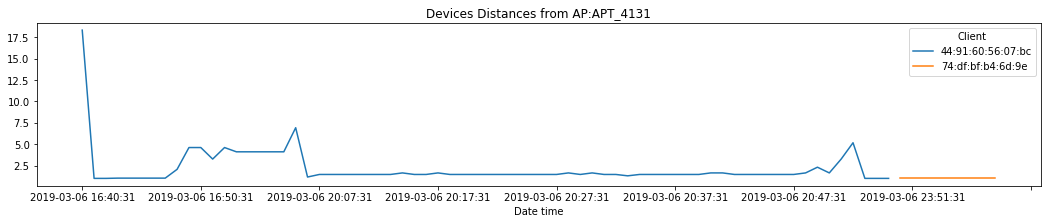

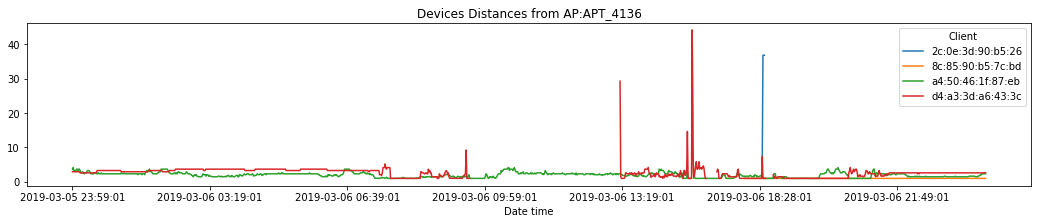

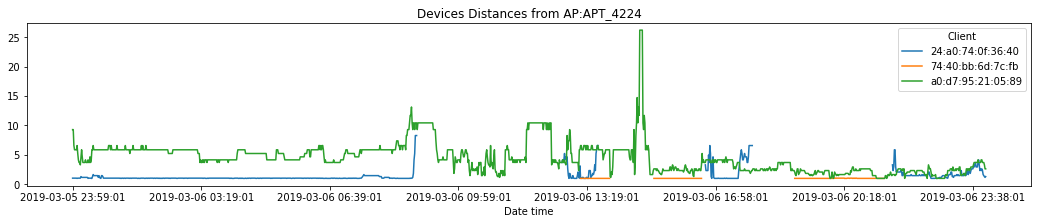

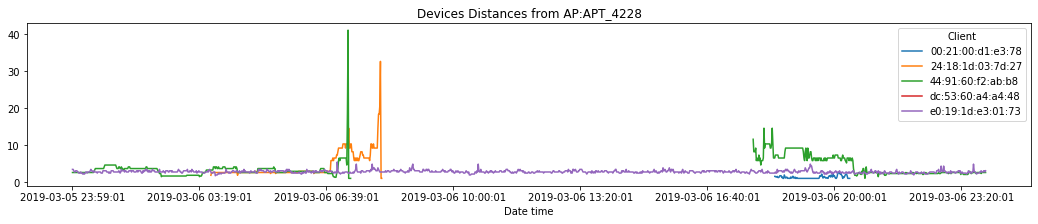

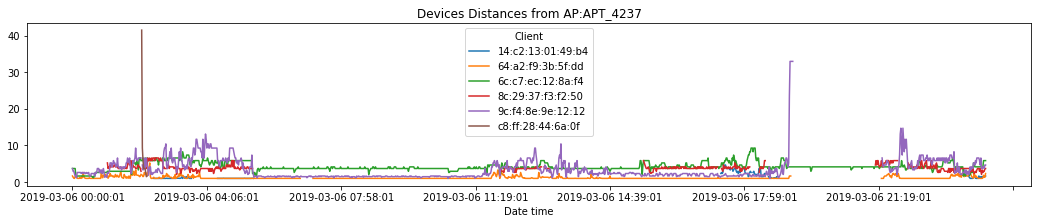

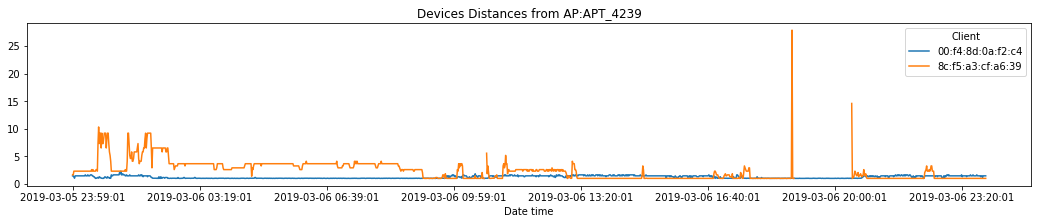

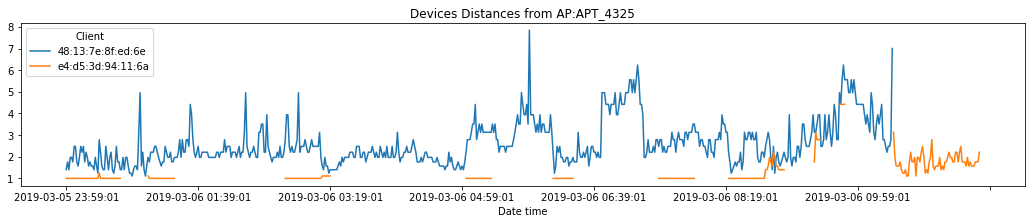

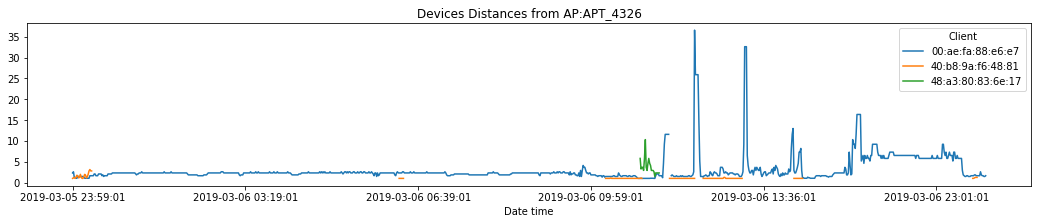

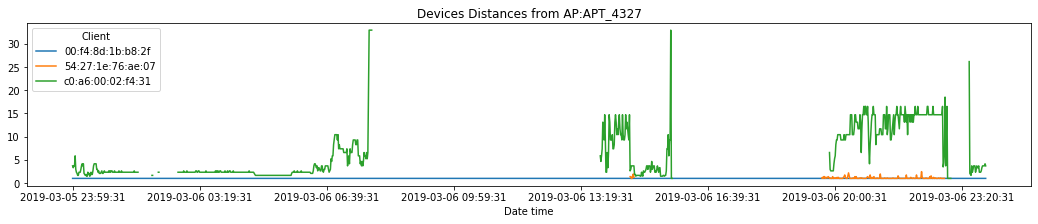

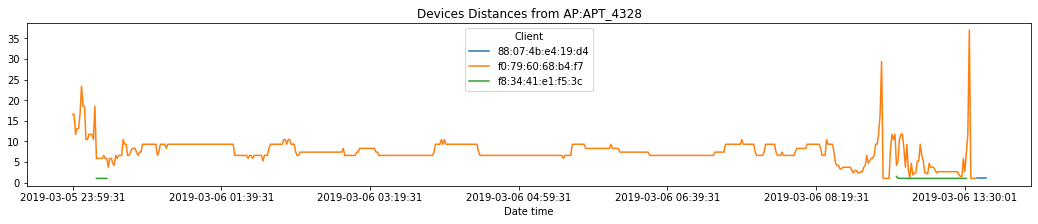

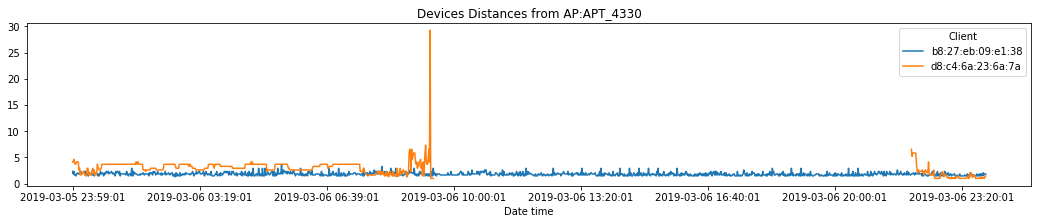

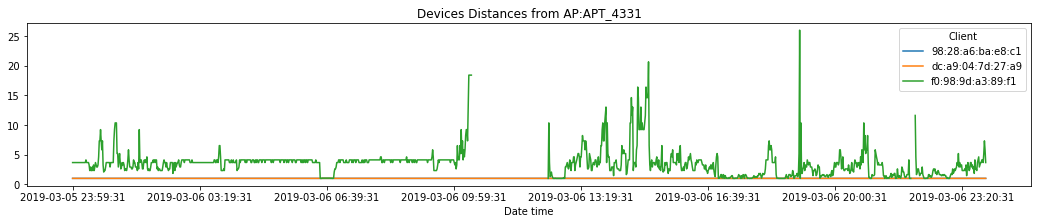

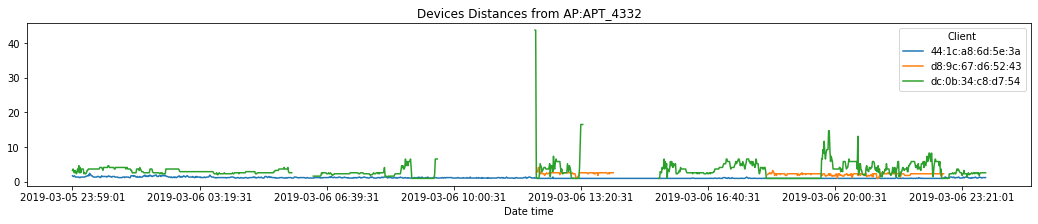

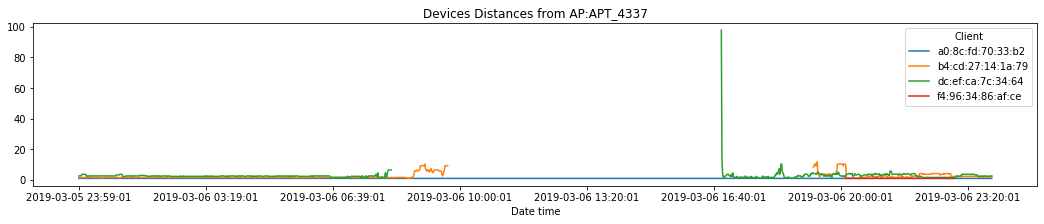

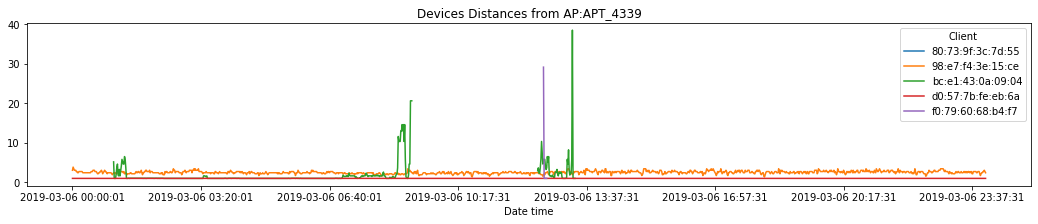

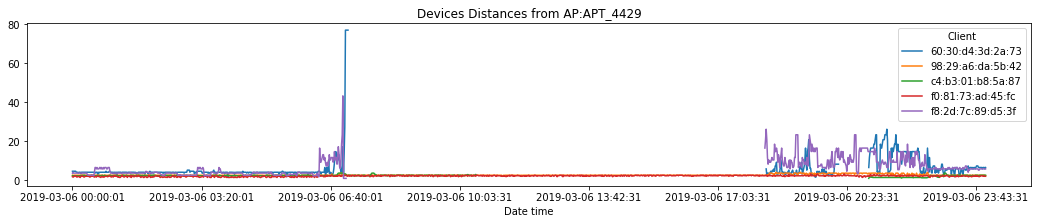

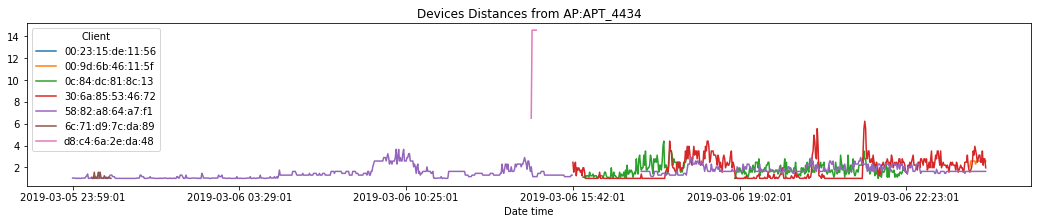

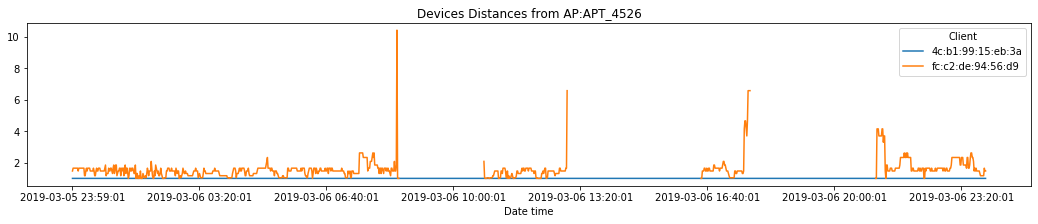

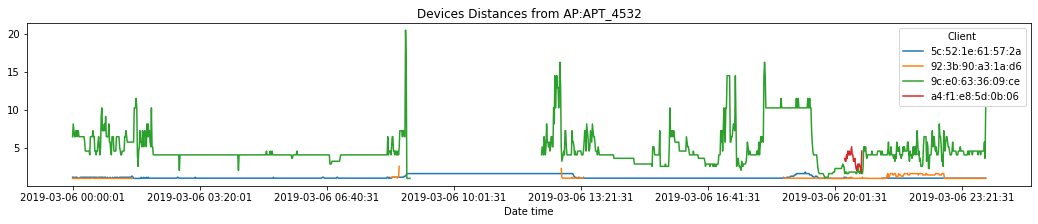

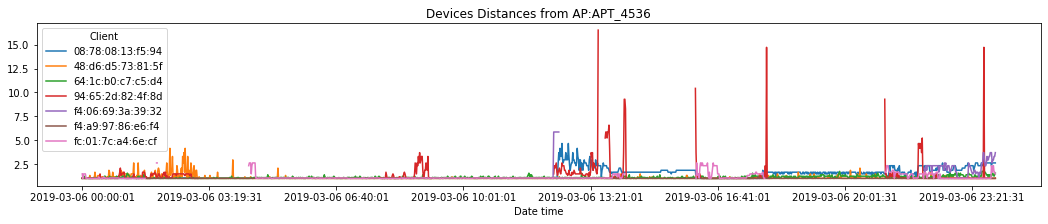

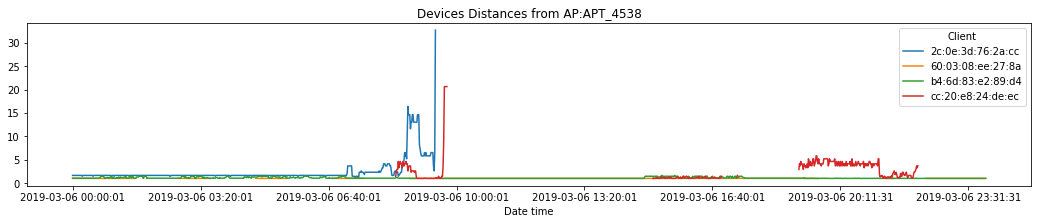

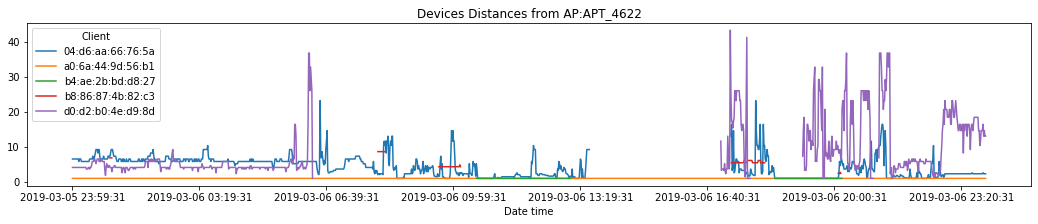

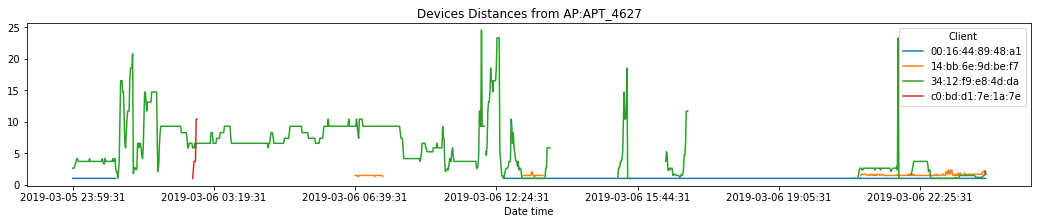

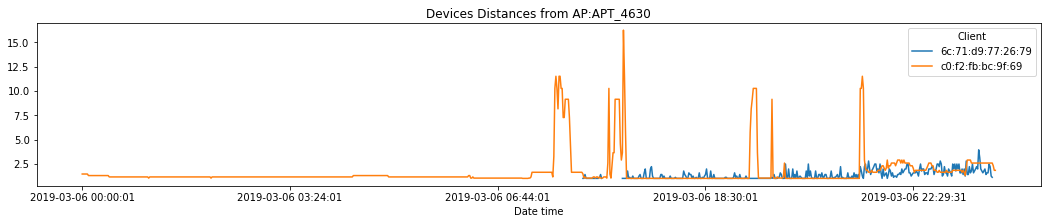

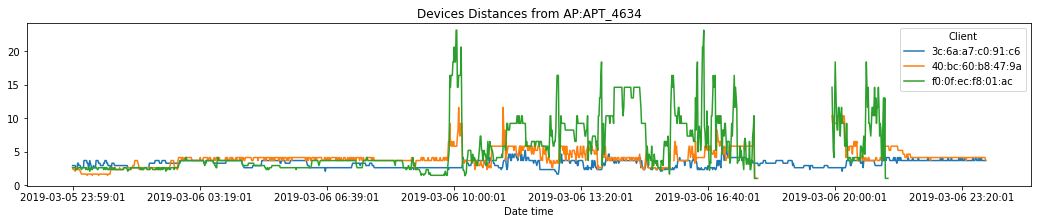

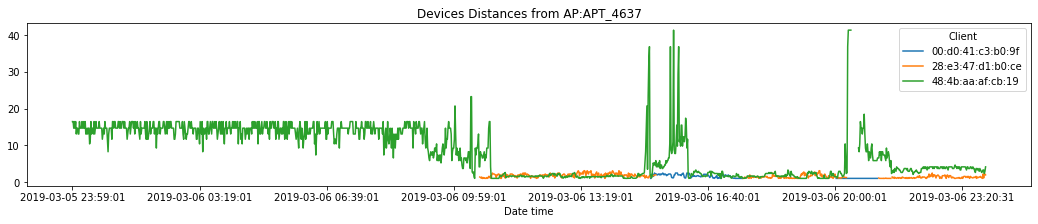

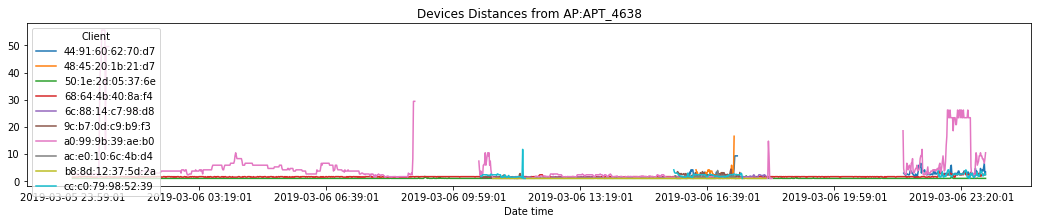

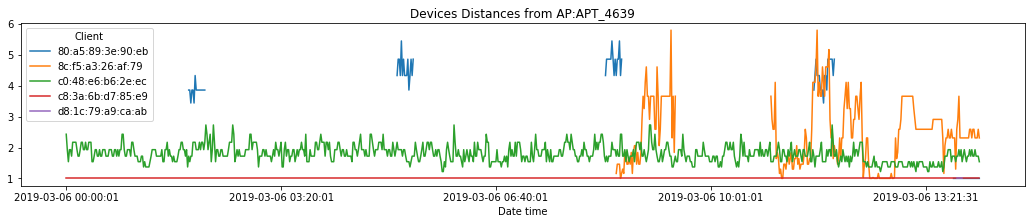

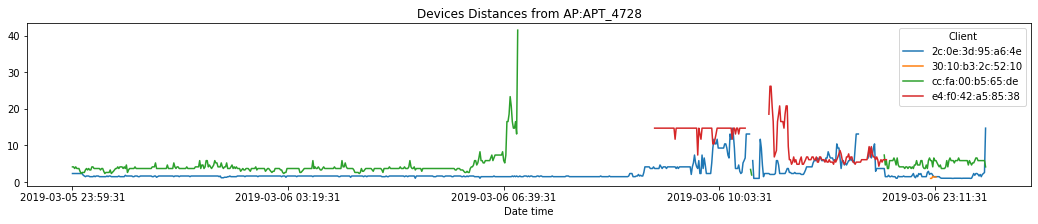

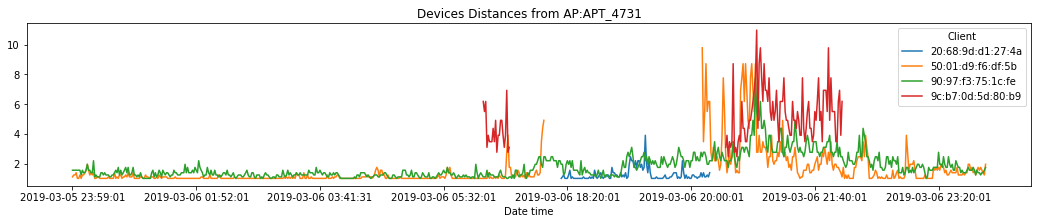

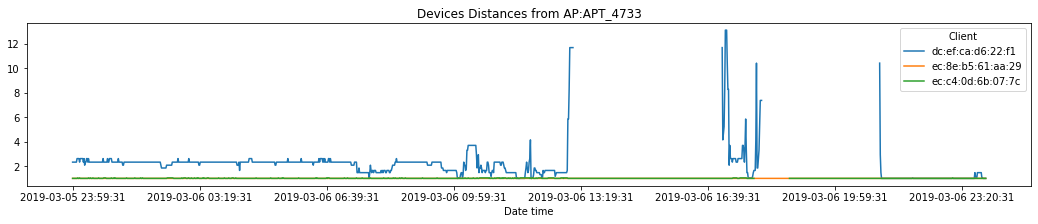

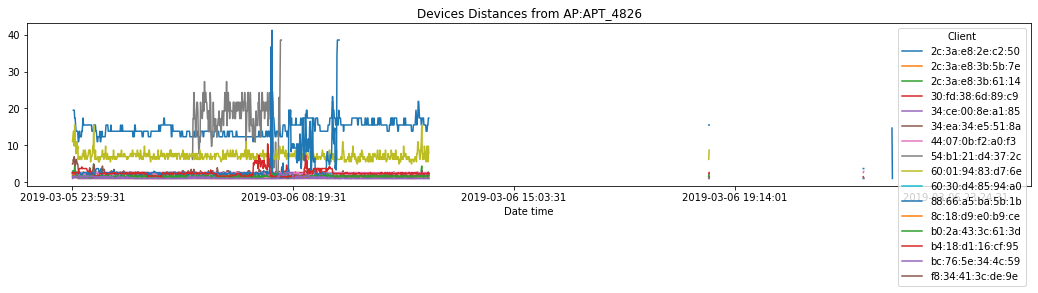

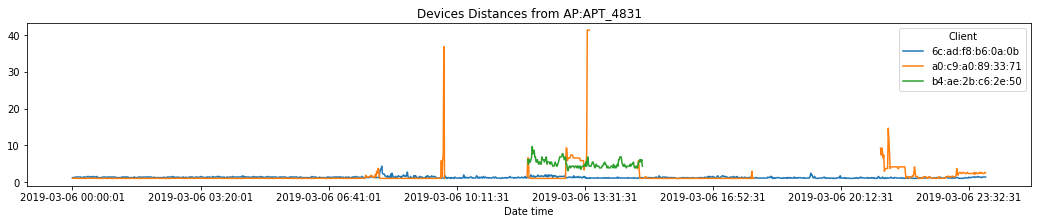

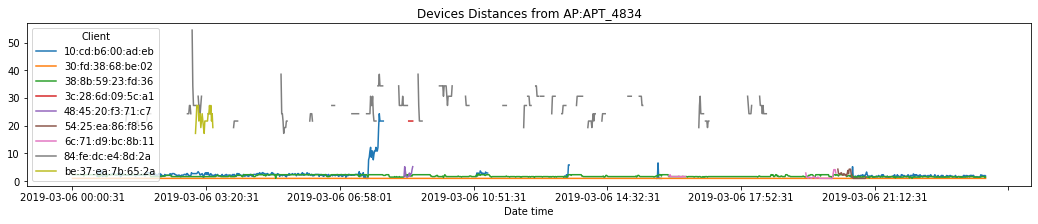

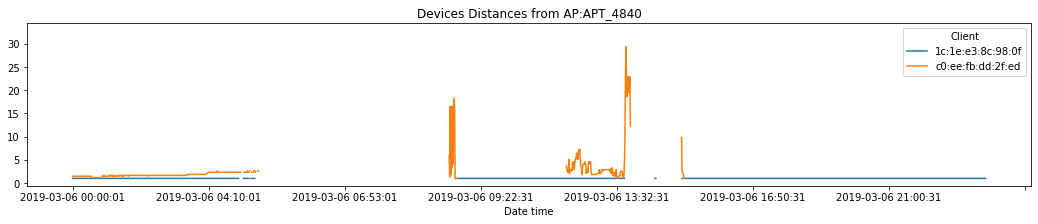

In [33]:
# test with file1
data = data1.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 
sp_data['distance'] = sp_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)

aps = sp_data['ssid'].unique()

for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap]  
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

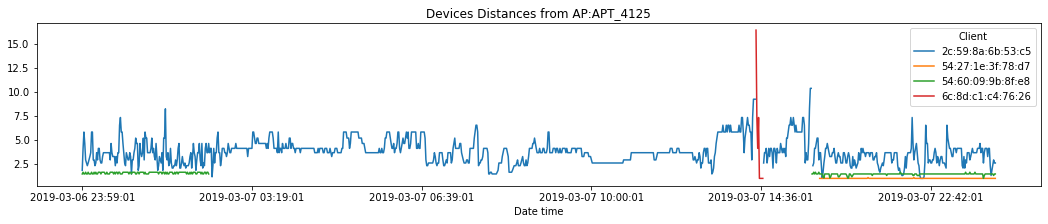

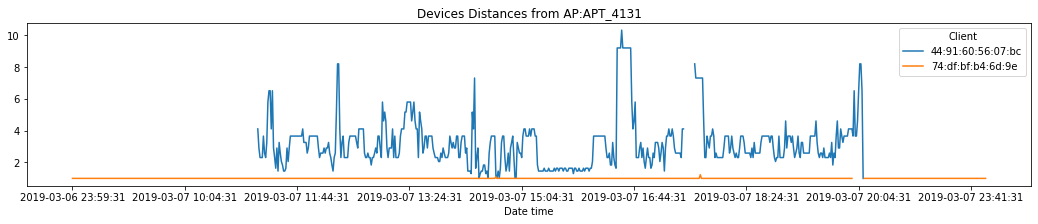

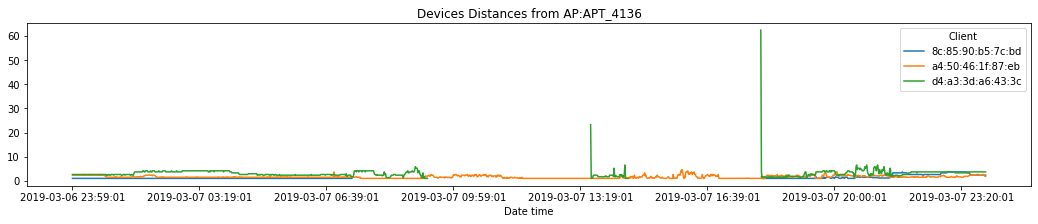

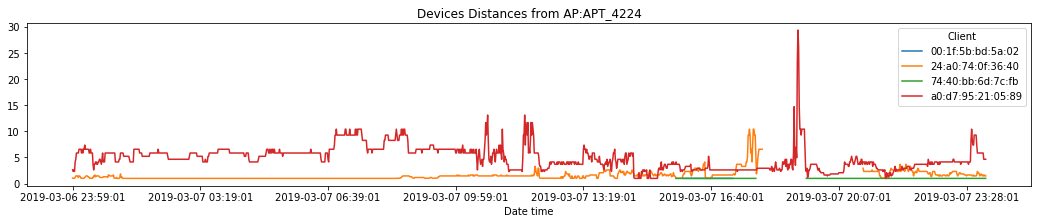

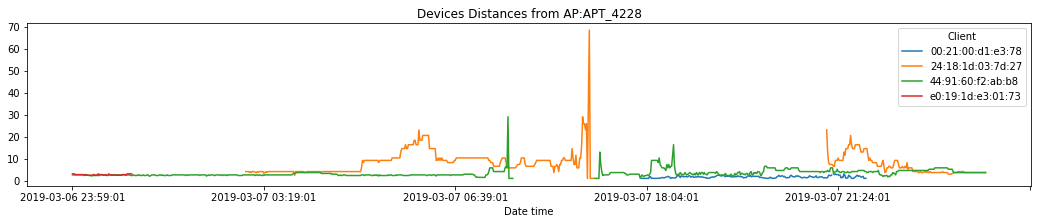

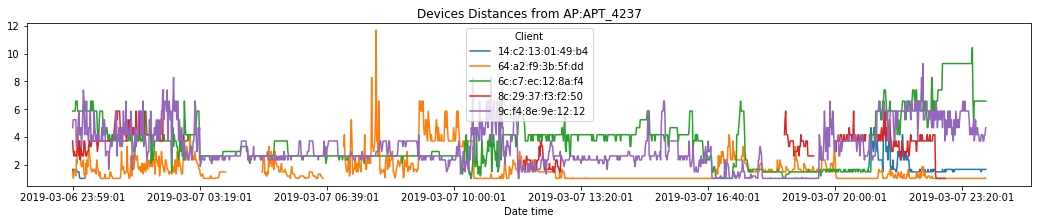

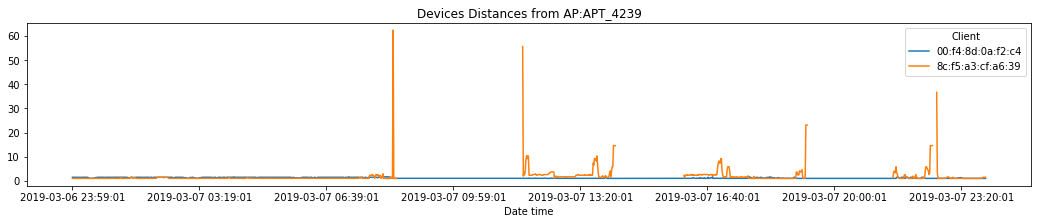

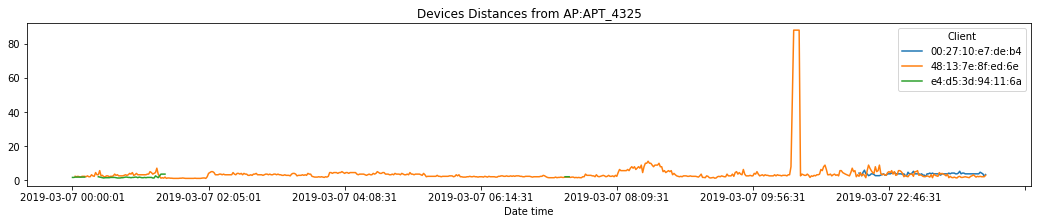

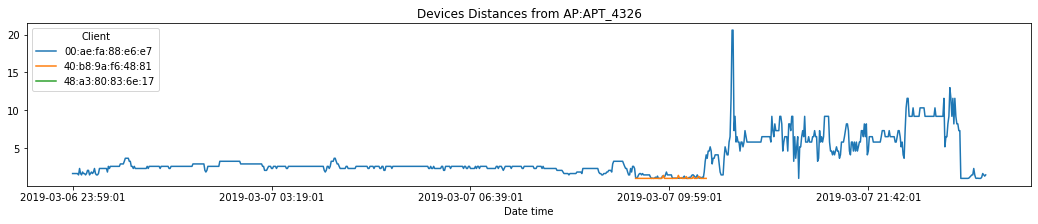

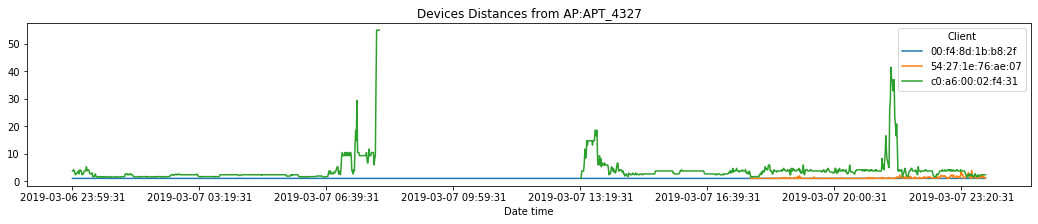

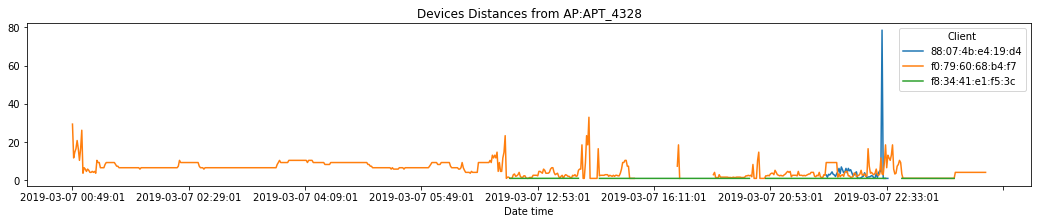

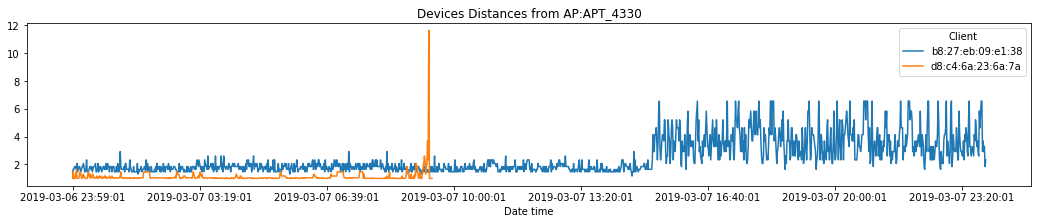

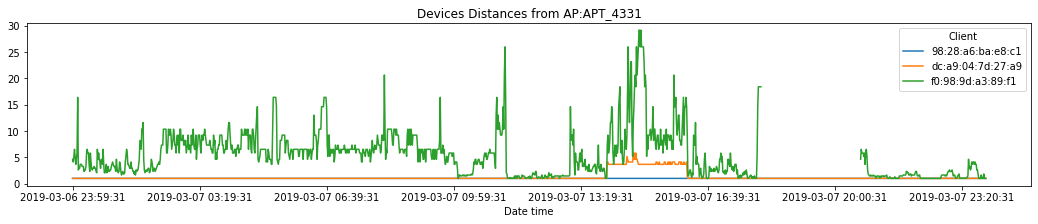

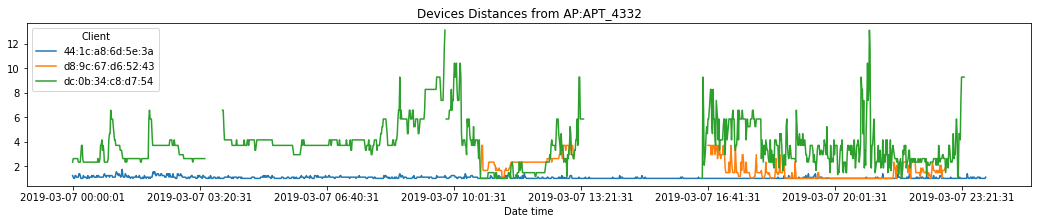

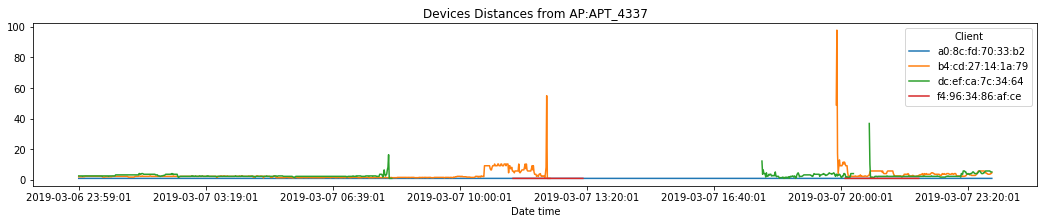

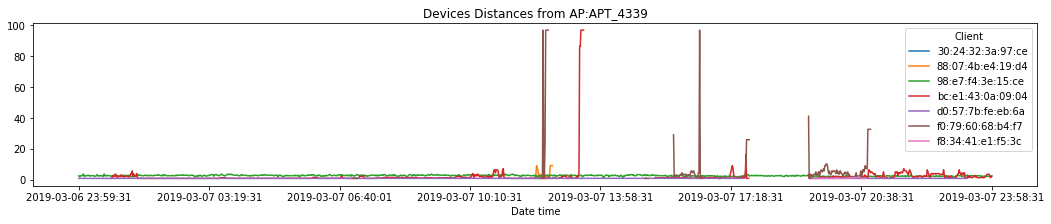

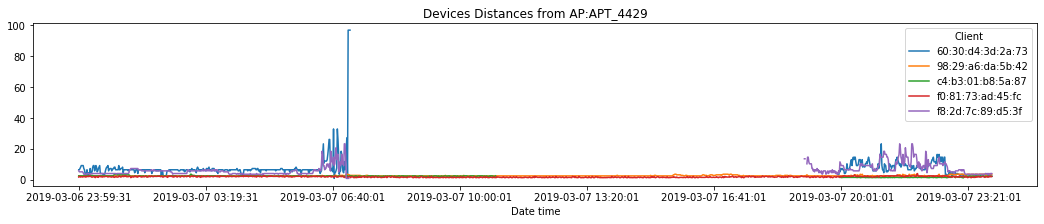

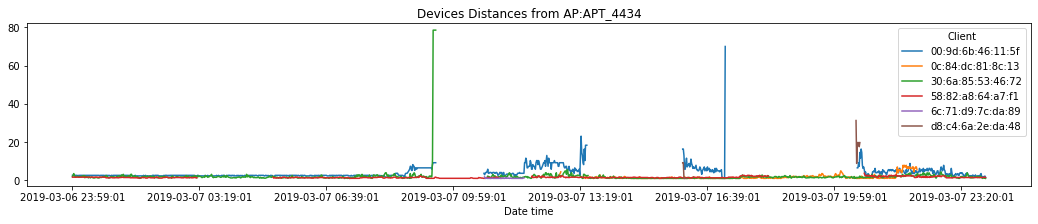

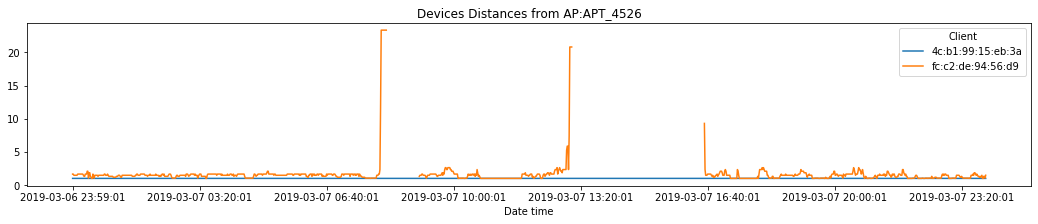

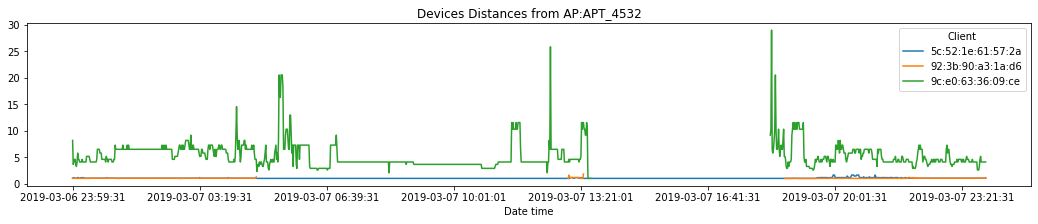

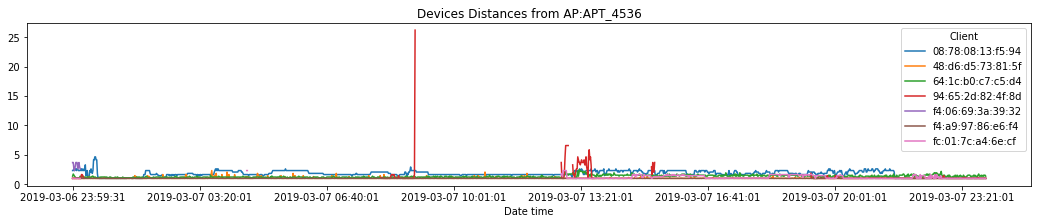

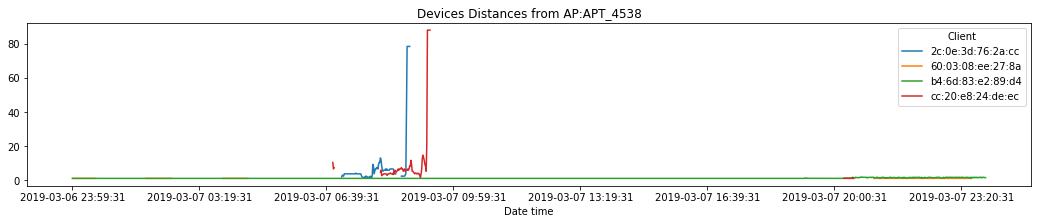

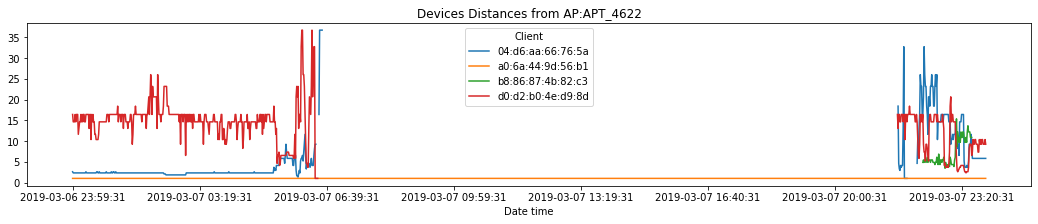

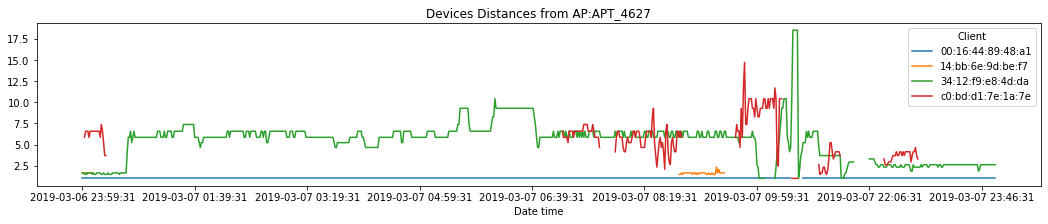

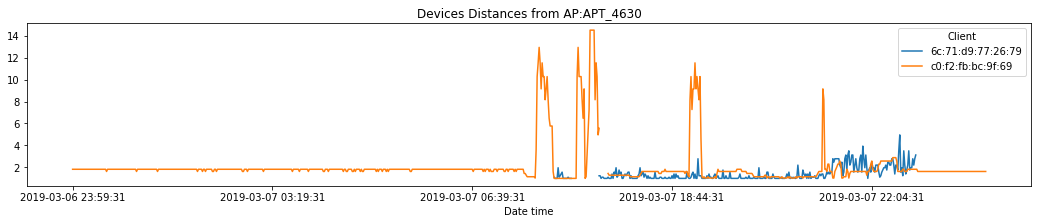

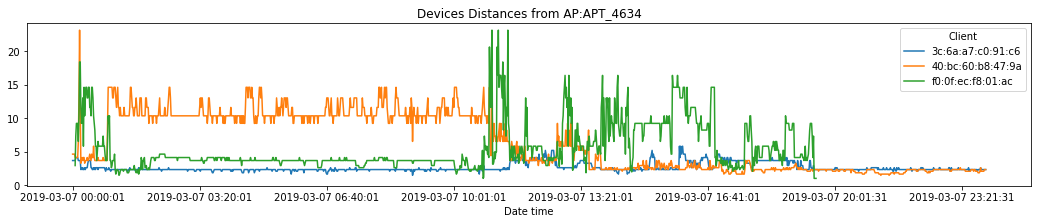

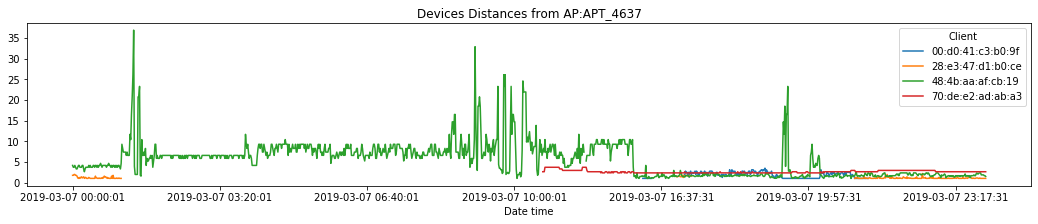

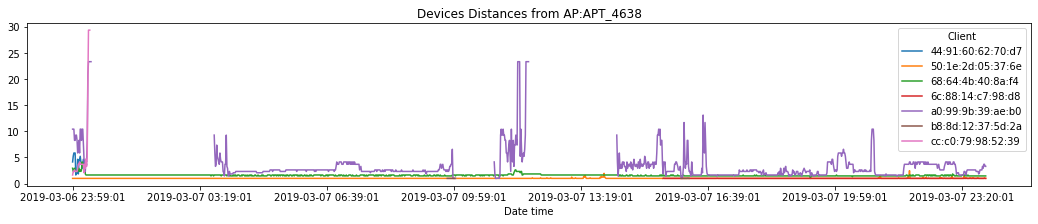

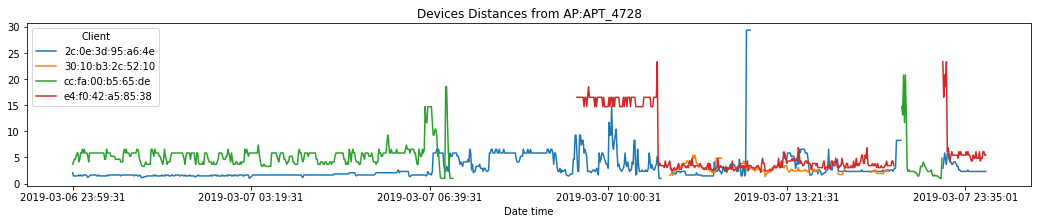

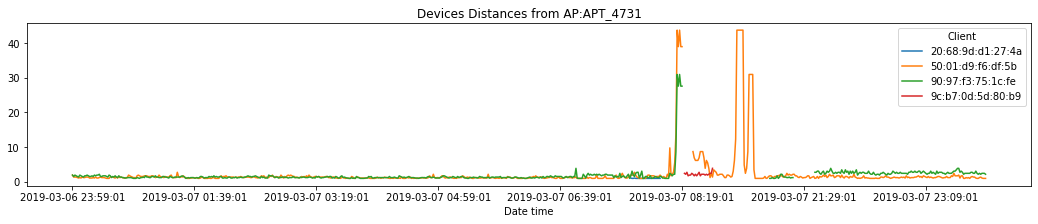

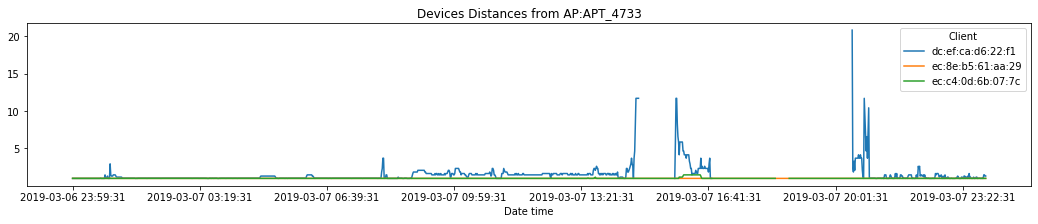

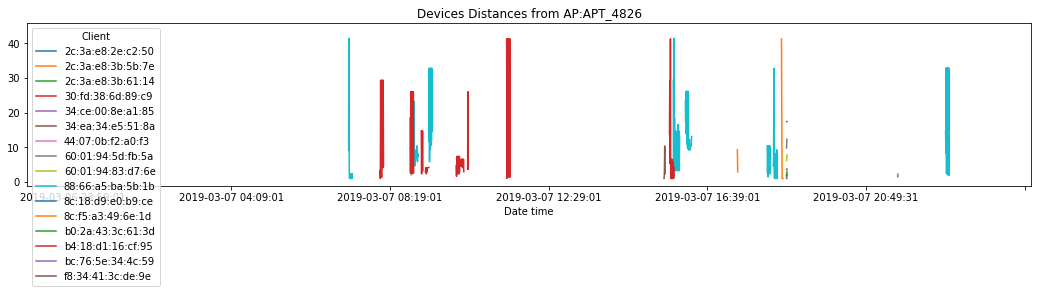

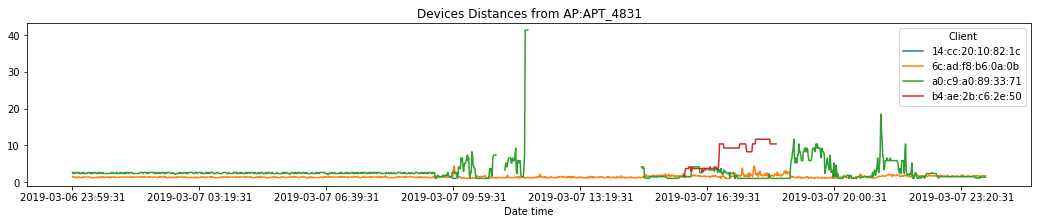

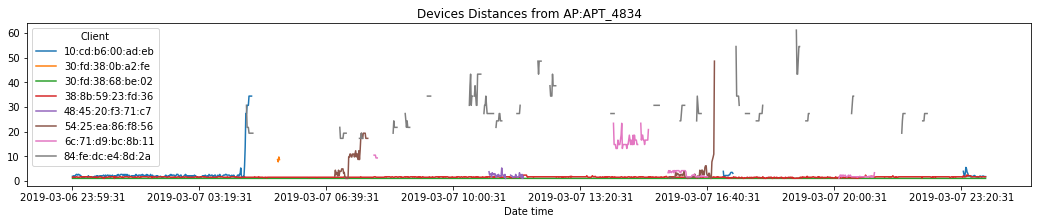

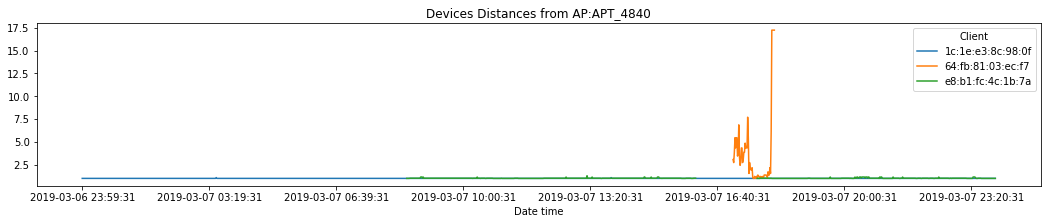

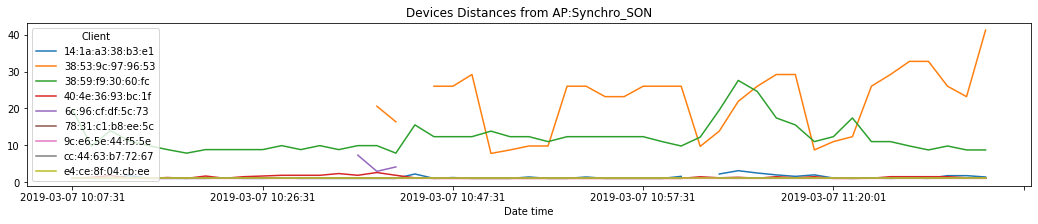

In [34]:
# test with file2
data = data2.copy()
sp_data = data[['ssid','Client','Date time','channelFreq','signalStrength']]
sp_data = sp_data.groupby(['ssid','Client','Date time']).mean().reset_index()
sp_data.sort_values(['Client','Date time'], ascending=True) 
sp_data['distance'] = sp_data.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    
aps = sp_data['ssid'].unique()
for ap in aps:
    ap_data = sp_data[sp_data.ssid==ap] 
    ap_data = ap_data.pivot(index='Date time', columns='Client', values='distance')
    ap_data.plot(title = 'Devices Distances from AP:'+ap,figsize=(18,3))

In [57]:
ap_data

ssid             Client            Date time  channelFreq  \
115440  Synchro_SON  14:1a:a3:38:b3:e1  2019-03-07 10:10:01         2437   
115441  Synchro_SON  14:1a:a3:38:b3:e1  2019-03-07 10:18:01         2412   
115442  Synchro_SON  14:1a:a3:38:b3:e1  2019-03-07 10:19:31         2412   
115443  Synchro_SON  14:1a:a3:38:b3:e1  2019-03-07 10:20:31         2412   
115444  Synchro_SON  14:1a:a3:38:b3:e1  2019-03-07 10:21:31         2412   
...             ...                ...                  ...          ...   
115808  Synchro_SON  e4:ce:8f:04:cb:ee  2019-03-07 11:24:01         5785   
115809  Synchro_SON  e4:ce:8f:04:cb:ee  2019-03-07 11:25:01         5785   
115810  Synchro_SON  e4:ce:8f:04:cb:ee  2019-03-07 11:26:01         5785   
115811  Synchro_SON  e4:ce:8f:04:cb:ee  2019-03-07 11:27:01         5785   
115812  Synchro_SON  e4:ce:8f:04:cb:ee  2019-03-07 11:28:01         5785   

        signalStrength  distance  
115440           -35.0      1.00  
115441           -37.0      1.00  
115442           -45.0      1.76  
115443           -38.0      1.00  
115444           -39.0      1.00  
...                ...       ...  
115808           -31.0      1.00  
115809           -31.0      1.00  
115810           -31.0      1.00  
115811           -31.0      1.00  
115812           -31.0      1.00  

[373 rows x 6 columns]

In [89]:
#get mobility of 'client' connected to the 'ap'
import numpy as np
def getMobilitySeq(ap,client):
    ap_data = sp_data[sp_data.ssid==ap][['Client','Date time','distance']]
    date_time = ap_data['Date time'].unique() 

    #fullfill base_seq based on date time
    dv = client
    dv_data = ap_data[ap_data['Client']==dv] 
    for dt in date_time:
        if dt not in dv_data['Date time'].tolist(): 
            dv_data.loc[-1]=[dv,dt,0]
            dv_data.index = dv_data.index + 1  # shifting index
            dv_data = dv_data.sort_index()  # sorting by index
    dv_data = dv_data.sort_values(['Date time'], ascending=True) 
    base_seq = dv_data['distance'].tolist()
    return base_seq

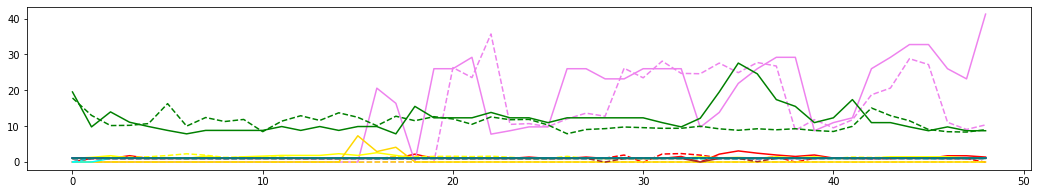

In [139]:
#predition on user mobility using HMM 
import matplotlib.pyplot as plt
from hmmlearn import hmm

ap = 'Synchro_SON'
devices = sp_data[sp_data.ssid==ap]['Client'].unique()

fig= plt.figure(figsize=(18,3))
color_list = ['red','violet','green', 'yellow','gold','blue','cyan','brown','teal','indigo']
cl = 0

for dv in devices:
    base_seq = getMobilitySeq(ap,dv)
    model = hmm.GaussianHMM(n_components=5,covariance_type="full")
    plt.plot(base_seq,color=color_list[cl])

    seq = np.array(base_seq).reshape(-1, 1)
    tr = model.fit(seq)
    re = model.predict(seq)
    X, Z = model.sample(len(base_seq))
    px = [i[0] for i in X]

    plt.plot(px,'--',color=color_list[cl])
    cl+=1

plt.show()

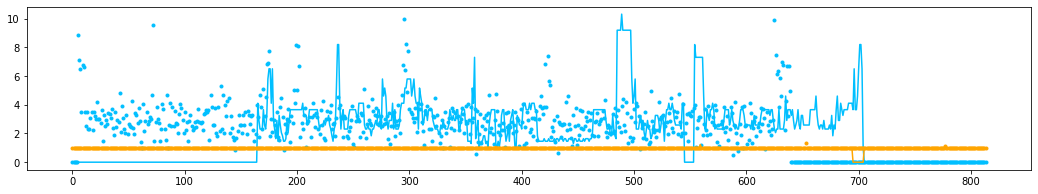

In [181]:
ap = 'APT_4131'
devices = sp_data[sp_data.ssid==ap]['Client'].unique()

fig= plt.figure(figsize=(18,3))
color_list = ['deepskyblue','orange','red','violet','green','gold','cyan','brown','teal','indigo']
cl = 0


model = hmm.GaussianHMM(n_components=3,covariance_type="full")
for dv in devices:
    base_seq = getMobilitySeq(ap,dv)
    plt.plot(base_seq,color=color_list[cl])

    seq = np.array(base_seq).reshape(-1, 1)
    tr = model.fit(seq)
    re = model.predict(seq)
    X, Z = model.sample(len(base_seq))
    px = [i[0] for i in X]

    plt.plot(px,'.',color=color_list[cl])
    cl+=1

plt.show()

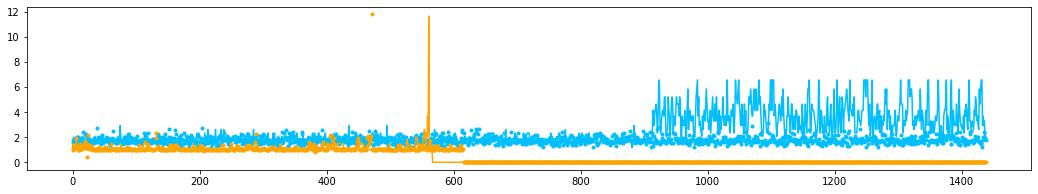

In [164]:
ap = 'APT_4330'
devices = sp_data[sp_data.ssid==ap]['Client'].unique()

fig= plt.figure(figsize=(18,3))
color_list = ['deepskyblue','orange','red','violet','green','gold','cyan','brown','teal','indigo']
cl = 0

model = hmm.GaussianHMM(n_components=5,covariance_type="full")
for dv in devices:
    base_seq = getMobilitySeq(ap,dv)
    plt.plot(base_seq,color=color_list[cl])

    seq = np.array(base_seq).reshape(-1, 1)
    tr = model.fit(seq)
    re = model.predict(seq)
    X, Z = model.sample(len(base_seq))
    px = [i[0] for i in X]

    plt.plot(px,'.',color=color_list[cl])
    cl+=1

plt.show()

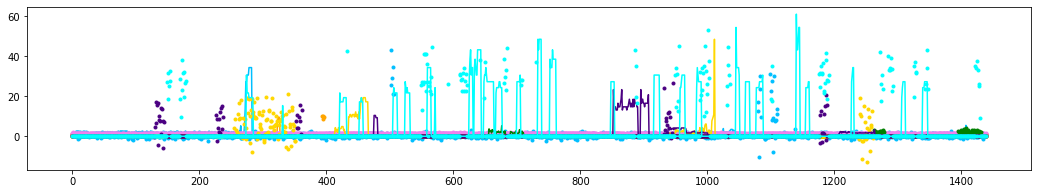

In [180]:
ap = 'APT_4834'
devices = sp_data[sp_data.ssid==ap]['Client'].unique()

fig= plt.figure(figsize=(18,3))
color_list = ['deepskyblue','orange','red','violet','green','gold','indigo','cyan','teal','brown']
cl = 0

model = hmm.GaussianHMM(n_components=2,covariance_type="full")
for dv in devices:
    base_seq = getMobilitySeq(ap,dv)
    plt.plot(base_seq,color=color_list[cl])

    seq = np.array(base_seq).reshape(-1, 1)
    tr = model.fit(seq)
    re = model.predict(seq)
    X, Z = model.sample(len(base_seq))
    px = [i[0] for i in X]

    plt.plot(px,'.',color=color_list[cl])
    cl+=1

plt.show()